In [1]:
import pandas as pd
import glob

# Define the path to the dataset
data_path = '/home/moraa/Documents/Machine-learning/Gas_Sensor/artifacts/data_ingestion/Dataset/'

# Use glob to find all .dat files in the specified directory
file_paths = glob.glob(data_path + 'batch*.dat')

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file path
for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            # Split the line by spaces and create a dictionary for key-value pairs
            values = line.strip().split(' ')
            # Parse the first value (assuming it’s a label or index)
            label = values[0]  # You might need to adjust based on what this represents
            sensor_data = {int(kv.split(':')[0]): float(kv.split(':')[1]) for kv in values[1:]}
            # Append the label to the dictionary
            sensor_data['label'] = label
            # Create a DataFrame from the dictionary and append to the list
            dataframes.append(pd.DataFrame(sensor_data, index=[0]))

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dataframes, ignore_index=True)

# Display the shape and first few rows of the combined DataFrame
print(data.shape)
print(data.head())


(13910, 129)
            1         2         3         4          5         6         7  \
0  11977.0371  2.946364  2.490357  3.283046   8.131875 -1.657614 -2.670484   
1  21234.2896  4.223873  4.758852  6.588781  10.873780 -3.145160 -4.474324   
2  13190.5258  3.139281  2.743704  3.603623   8.335304 -1.807550 -2.781656   
3  15803.7851  3.500589  3.375378  4.549901   8.983869 -2.278670 -3.915519   
4  16342.6787  3.497127  3.393961  4.303557   8.713730 -2.173565 -3.373084   

           8           9        10  ...        120         121       122  \
0 -11.795855     87.6957  1.159134  ...  -7.170650   8644.8520  2.833984   
1 -14.394855  33730.9175  7.440933  ... -14.347134  18538.2510  4.372579   
2  -9.959871  32443.2602  5.922316  ...  -7.089700   8914.2002  2.809080   
3 -11.937122  29541.8398  3.865898  ... -16.511583  18378.3940  4.215725   
4 -11.741132  38268.0747  6.157833  ...  -6.492106   8903.2504  2.907423   

        123        124        125       126       127        

In [2]:
# Rename columns
sensor_columns = [f'sensor_{i}' for i in range(1, 129)]  # Adjust the range if needed
sensor_columns.append('gas_class')  # Assuming the last column is the target

# Assign new column names to the DataFrame
data.columns = sensor_columns

# Display the first few rows with new column names
print(data.head())


     sensor_1  sensor_2  sensor_3  sensor_4   sensor_5  sensor_6  sensor_7  \
0  11977.0371  2.946364  2.490357  3.283046   8.131875 -1.657614 -2.670484   
1  21234.2896  4.223873  4.758852  6.588781  10.873780 -3.145160 -4.474324   
2  13190.5258  3.139281  2.743704  3.603623   8.335304 -1.807550 -2.781656   
3  15803.7851  3.500589  3.375378  4.549901   8.983869 -2.278670 -3.915519   
4  16342.6787  3.497127  3.393961  4.303557   8.713730 -2.173565 -3.373084   

    sensor_8    sensor_9  sensor_10  ...  sensor_120  sensor_121  sensor_122  \
0 -11.795855     87.6957   1.159134  ...   -7.170650   8644.8520    2.833984   
1 -14.394855  33730.9175   7.440933  ...  -14.347134  18538.2510    4.372579   
2  -9.959871  32443.2602   5.922316  ...   -7.089700   8914.2002    2.809080   
3 -11.937122  29541.8398   3.865898  ...  -16.511583  18378.3940    4.215725   
4 -11.741132  38268.0747   6.157833  ...   -6.492106   8903.2504    2.907423   

   sensor_123  sensor_124  sensor_125  sensor_126 

In [3]:
data.head()

sensor_1  sensor_2  sensor_3  sensor_4   sensor_5  sensor_6  sensor_7  \
0  11977.0371  2.946364  2.490357  3.283046   8.131875 -1.657614 -2.670484   
1  21234.2896  4.223873  4.758852  6.588781  10.873780 -3.145160 -4.474324   
2  13190.5258  3.139281  2.743704  3.603623   8.335304 -1.807550 -2.781656   
3  15803.7851  3.500589  3.375378  4.549901   8.983869 -2.278670 -3.915519   
4  16342.6787  3.497127  3.393961  4.303557   8.713730 -2.173565 -3.373084   

    sensor_8    sensor_9  sensor_10  ...  sensor_120  sensor_121  sensor_122  \
0 -11.795855     87.6957   1.159134  ...   -7.170650   8644.8520    2.833984   
1 -14.394855  33730.9175   7.440933  ...  -14.347134  18538.2510    4.372579   
2  -9.959871  32443.2602   5.922316  ...   -7.089700   8914.2002    2.809080   
3 -11.937122  29541.8398   3.865898  ...  -16.511583  18378.3940    4.215725   
4 -11.741132  38268.0747   6.157833  ...   -6.492106   8903.2504    2.907423   

   sensor_123  sensor_124  sensor_125  sensor_126  sensor_127  sensor_128  \
0    2.063476    3.004145    5.358905   -1.387367   -2.142489   -6.199217   
1    6.203024   11.380773   14.663342   -4.112915   -6.365457  -12.539143   
2    2.110775    3.110680    5.728957   -1.459713   -2.201871   -6.398889   
3    6.140109   11.200258   14.870893   -4.010406   -6.422811  -12.380150   
4    2.041402    3.037082    5.453722   -1.451056   -2.163901   -6.076439   

   gas_class  
0          5  
1          4  
2          5  
3          4  
4          5  

[5 rows x 129 columns]

In [4]:
data.info

<bound method DataFrame.info of          sensor_1  sensor_2  sensor_3  sensor_4   sensor_5  sensor_6  \
0      11977.0371  2.946364  2.490357  3.283046   8.131875 -1.657614   
1      21234.2896  4.223873  4.758852  6.588781  10.873780 -3.145160   
2      13190.5258  3.139281  2.743704  3.603623   8.335304 -1.807550   
3      15803.7851  3.500589  3.375378  4.549901   8.983869 -2.278670   
4      16342.6787  3.497127  3.393961  4.303557   8.713730 -2.173565   
...           ...       ...       ...       ...        ...       ...   
13905   -124.0596  0.974146  0.000169  0.000100   0.000100 -0.559094   
13906    -53.6573  0.981065  0.002778  0.018861   0.000100 -0.549071   
13907    -52.0076  0.980492  0.002451  0.010516   0.026190 -0.532593   
13908    -57.6011  0.978761  0.000100  0.000100   0.000100 -0.566765   
13909    -50.1287  0.981138  0.003742  0.025935   0.234740 -0.532485   

       sensor_7   sensor_8    sensor_9  sensor_10  ...  sensor_120  \
0     -2.670484 -11.795855     87

In [7]:
data['gas_class'].nunique()

6

In [8]:
data['gas_class'].unique()

array(['5', '4', '6', '1', '2', '3'], dtype=object)

In [9]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Columns: 129 entries, sensor_1 to gas_class
dtypes: float64(128), object(1)
memory usage: 13.7+ MB
None
            sensor_1      sensor_2      sensor_3      sensor_4      sensor_5  \
count   13910.000000  13910.000000  13910.000000  13910.000000  13910.000000   
mean    50435.066174      6.638156     12.936688     18.743953     26.890695   
std     69844.785952     13.486391     17.610061     24.899450     38.107685   
min    -16757.598600      0.088287      0.000100      0.000100      0.000100   
25%      6694.725950      2.284843      1.633350      2.386836      4.967988   
50%     19364.439350      3.871227      4.977123      7.250892     11.680725   
75%     63104.837125      8.400619     17.189166     26.411109     34.843226   
max    670687.347700   1339.879283    167.079751    226.619457    993.605306   

           sensor_6      sensor_7      sensor_8       sensor_9     sensor_10  \
count  13910.000000

In [10]:
print(data.isnull().sum())  # Check for missing values
print(data.duplicated().sum())  # Check for duplicates


sensor_1      0
sensor_2      0
sensor_3      0
sensor_4      0
sensor_5      0
             ..
sensor_125    0
sensor_126    0
sensor_127    0
sensor_128    0
gas_class     0
Length: 129, dtype: int64
0


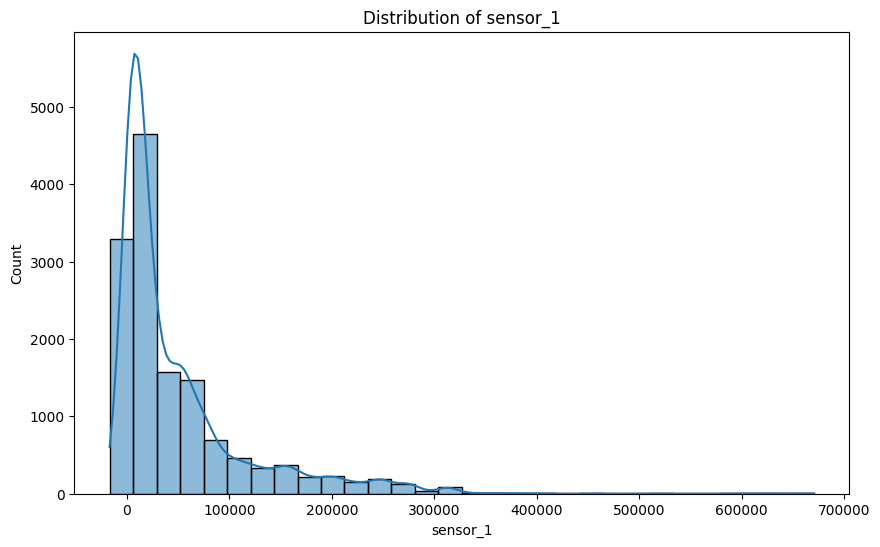

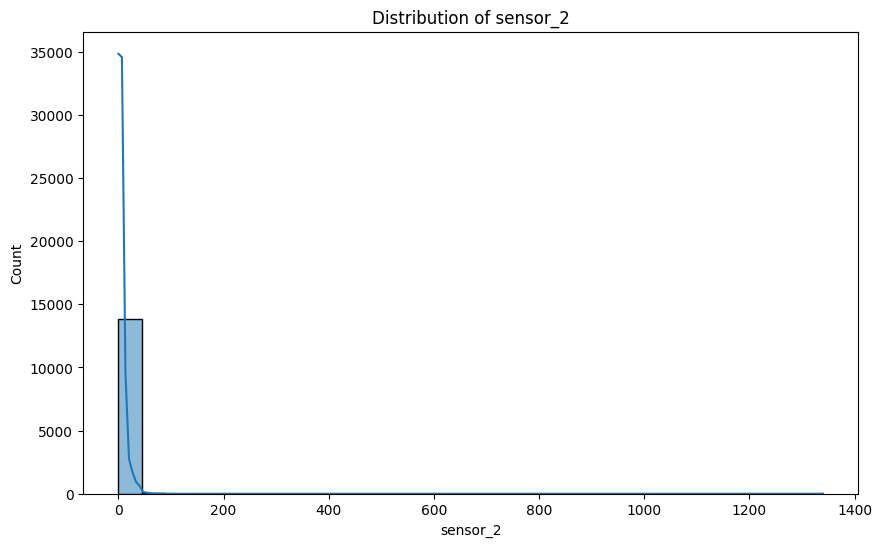

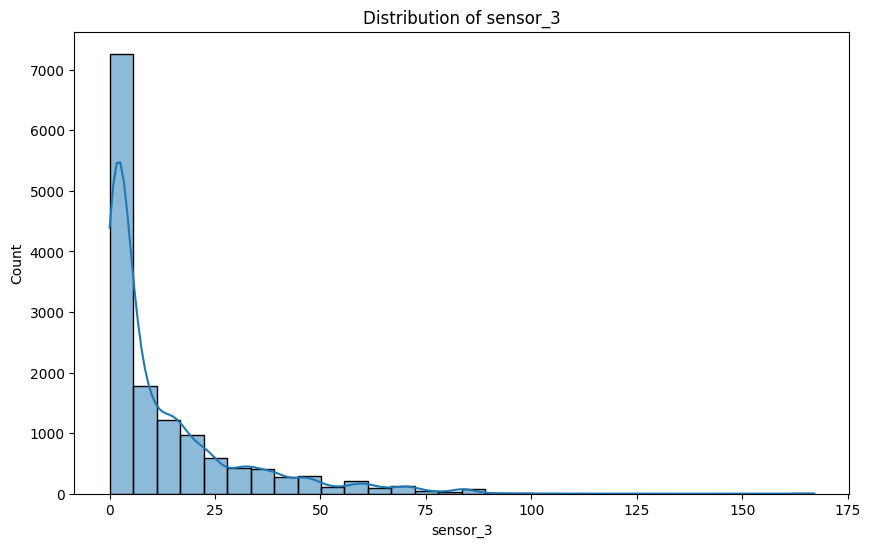

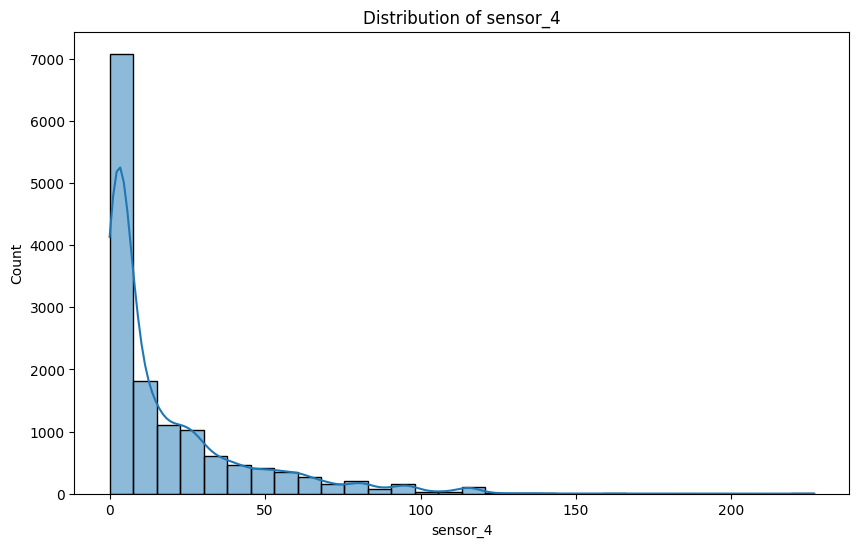

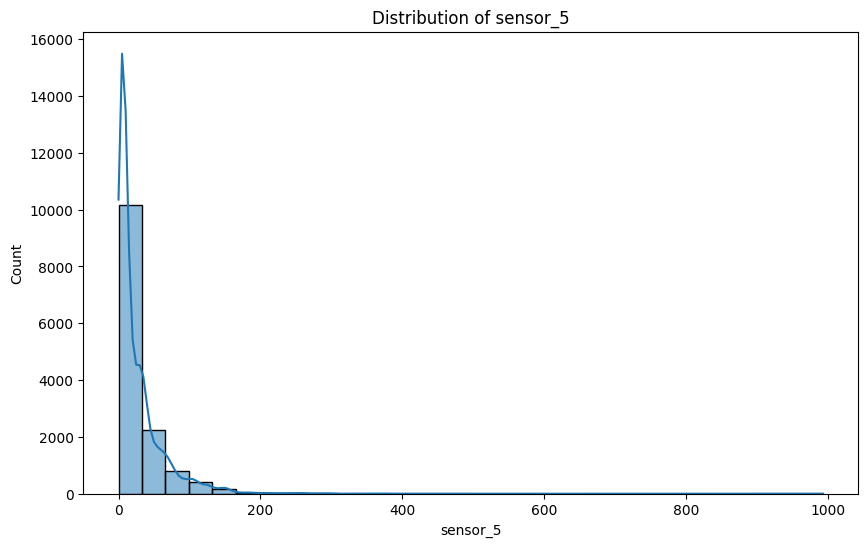

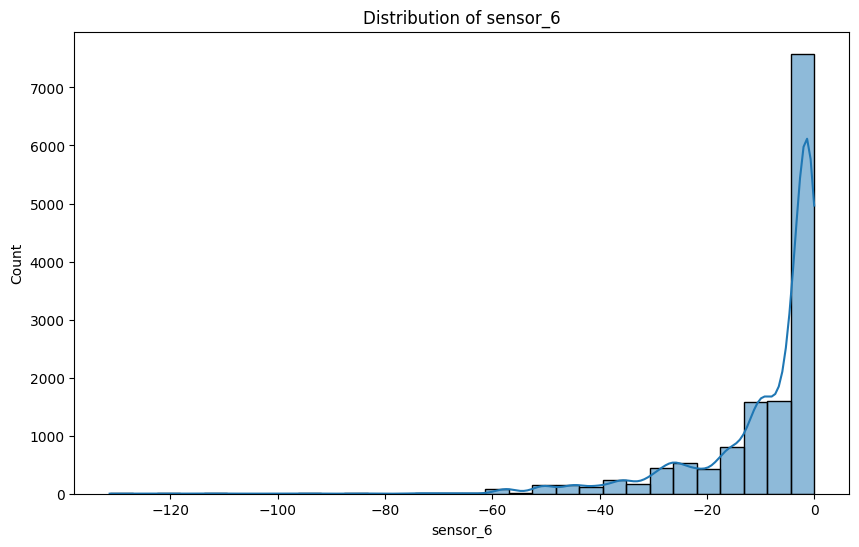

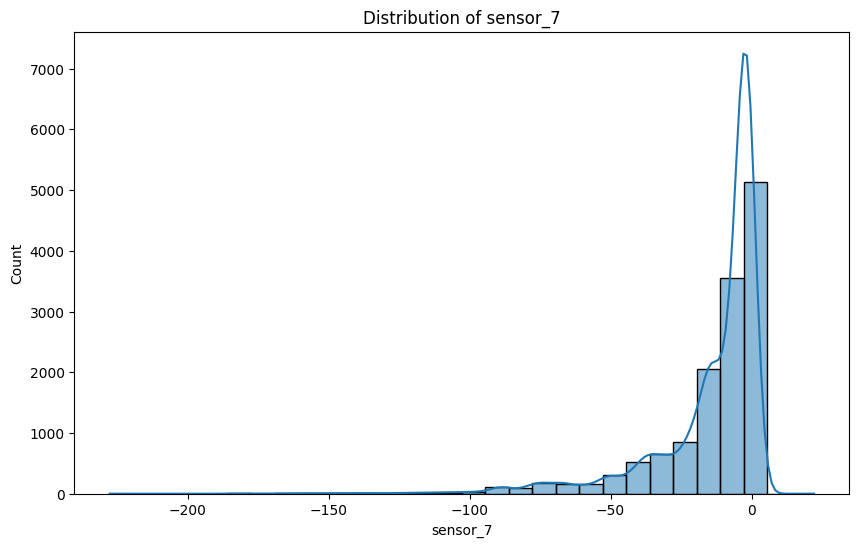

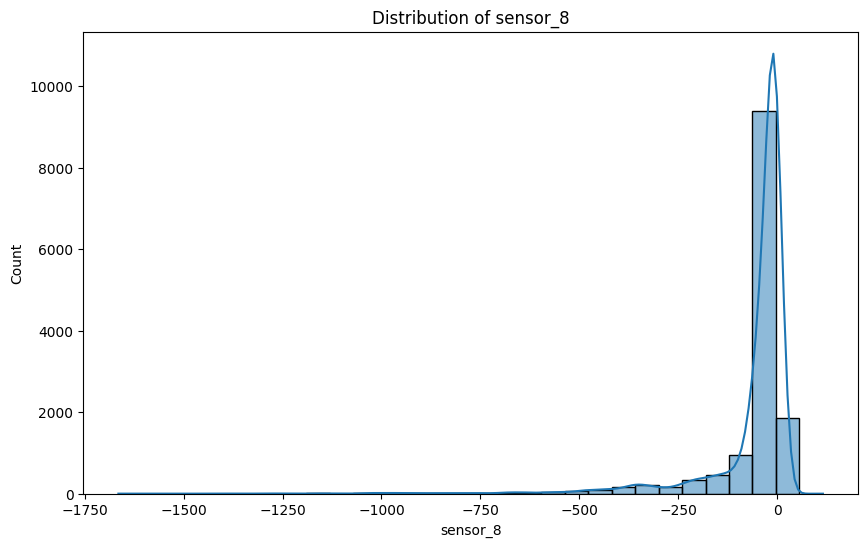

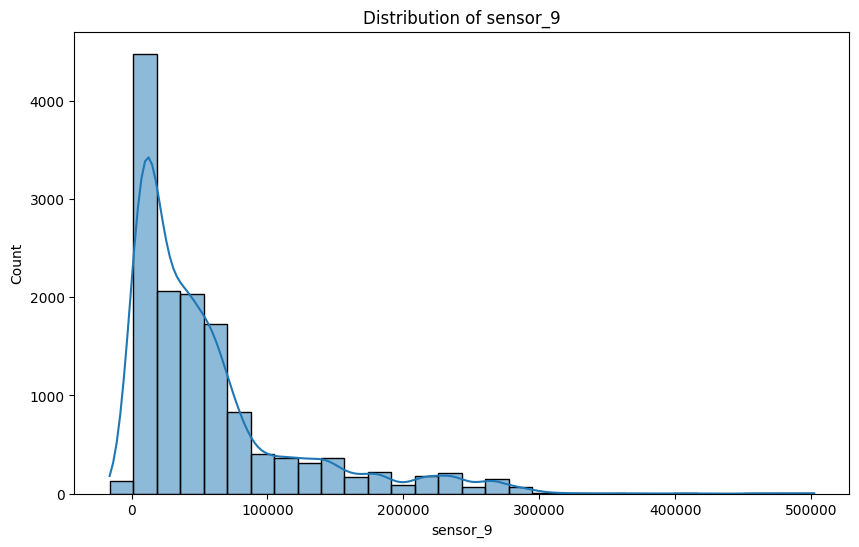

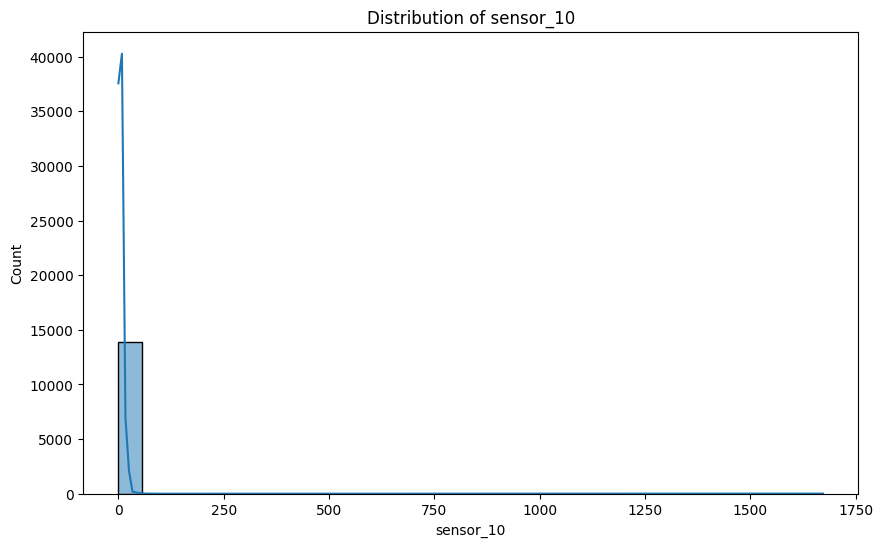

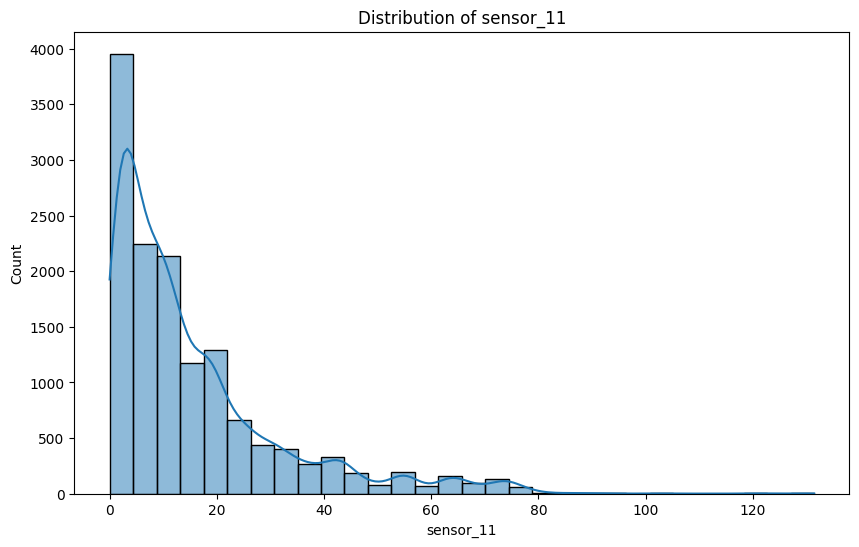

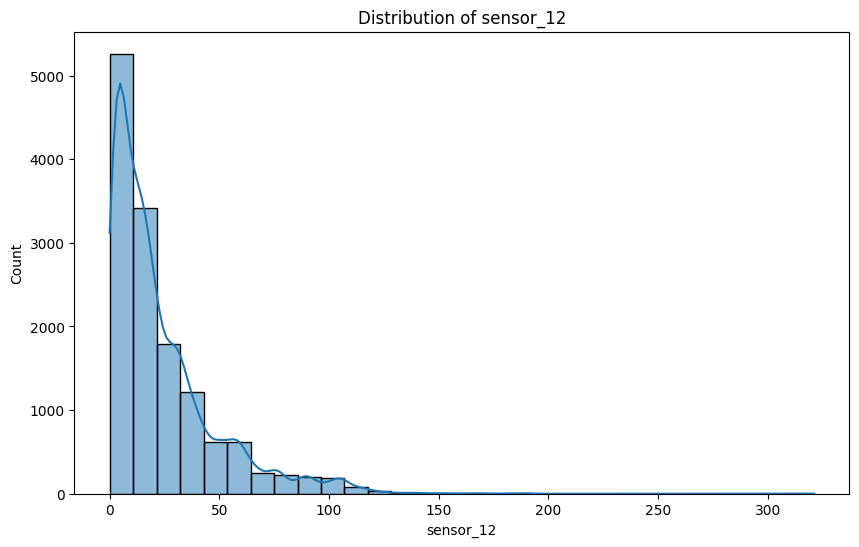

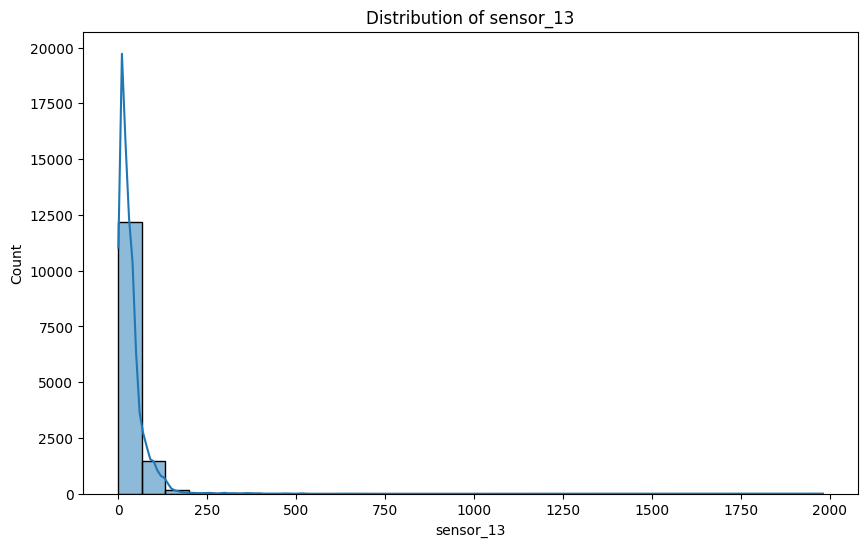

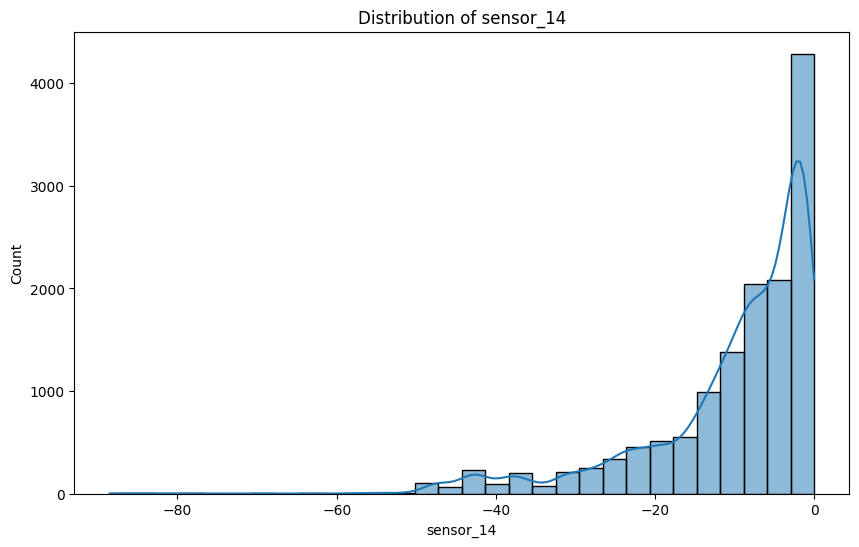

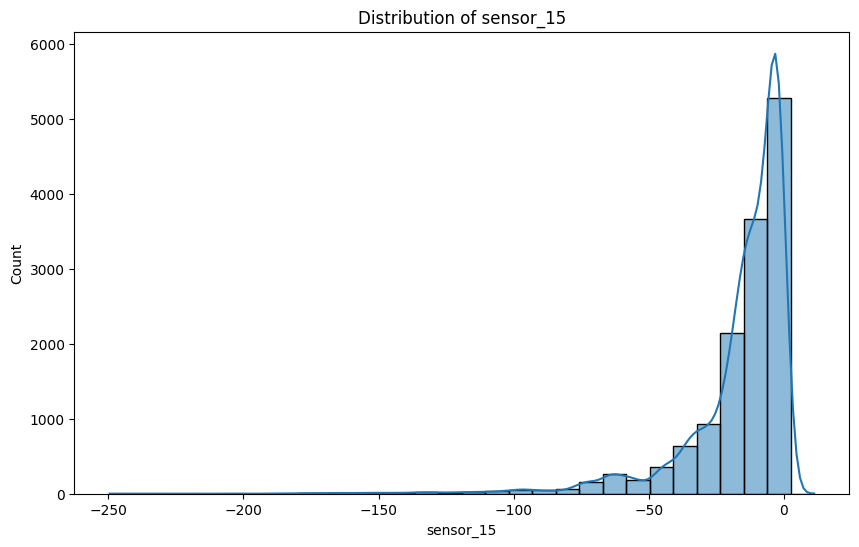

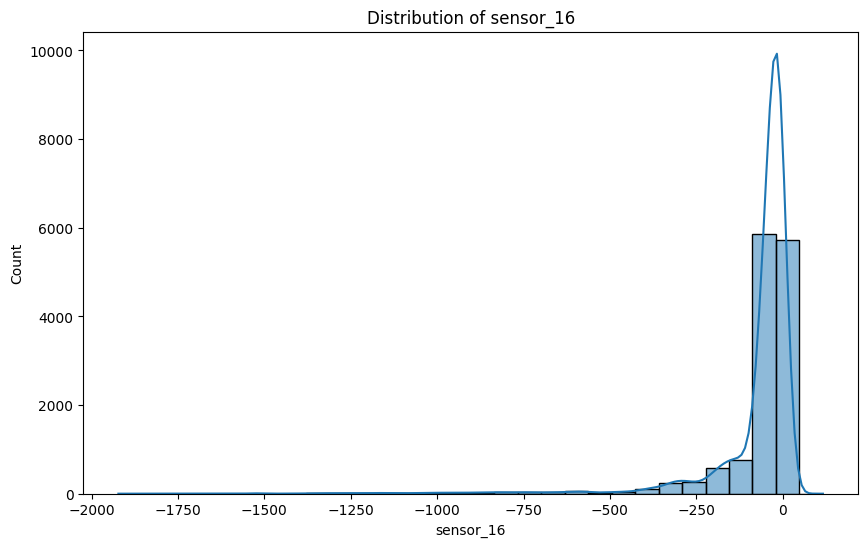

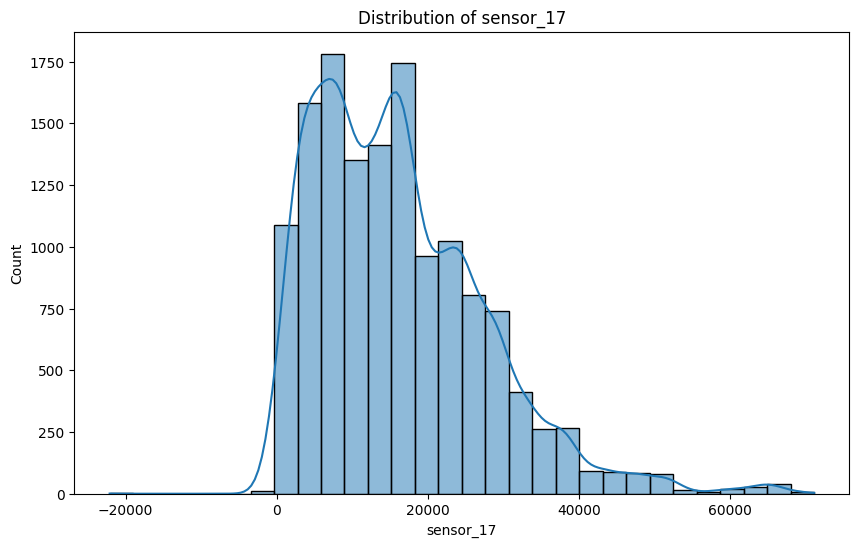

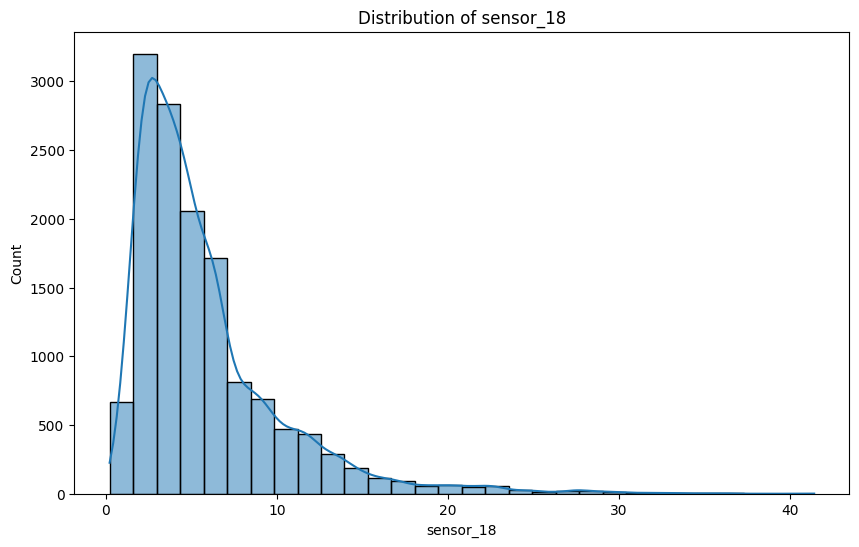

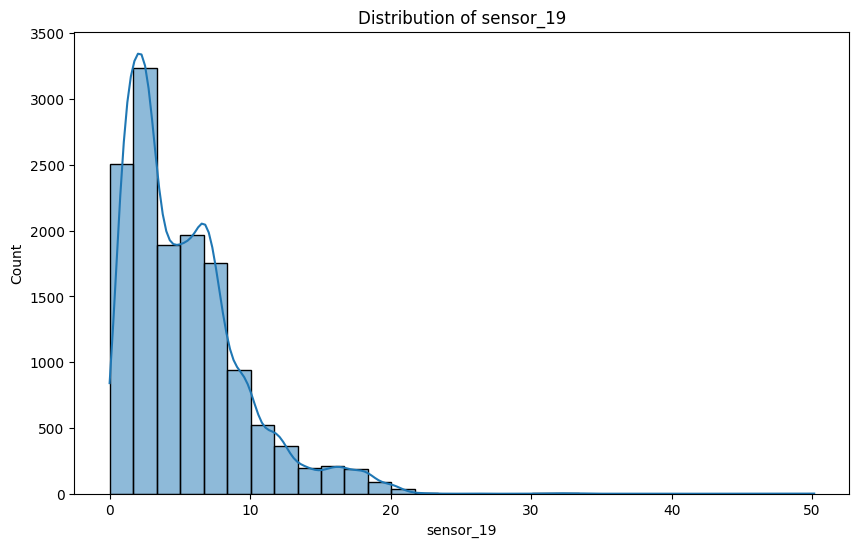

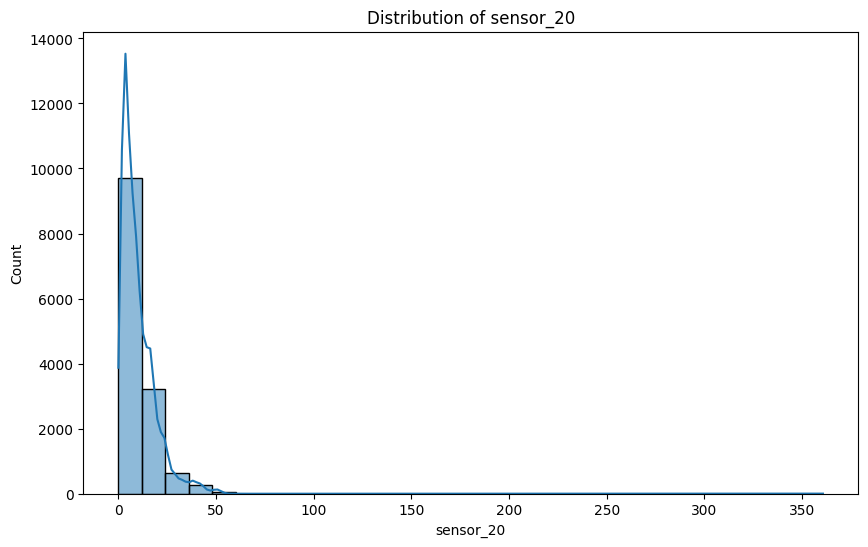

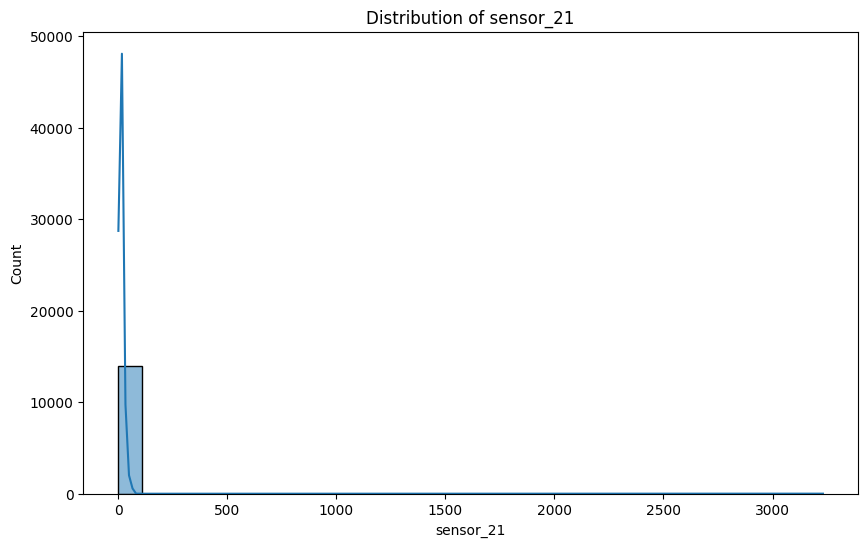

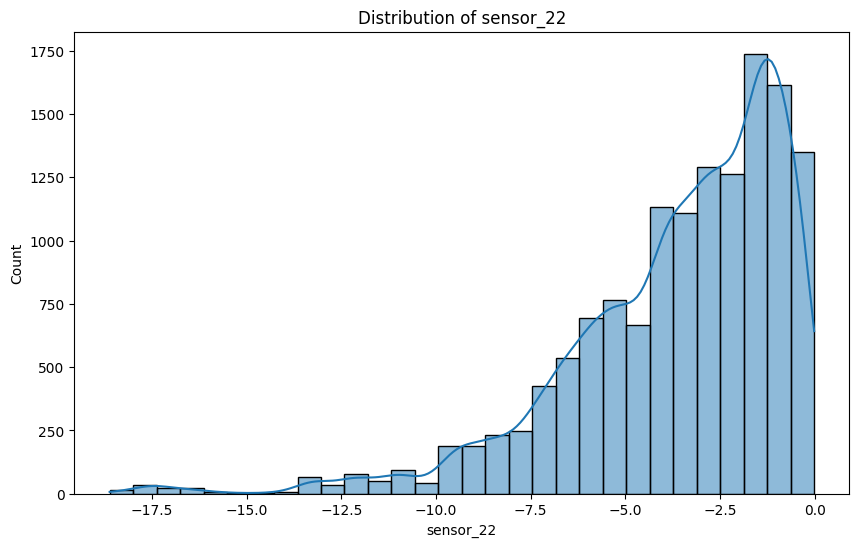

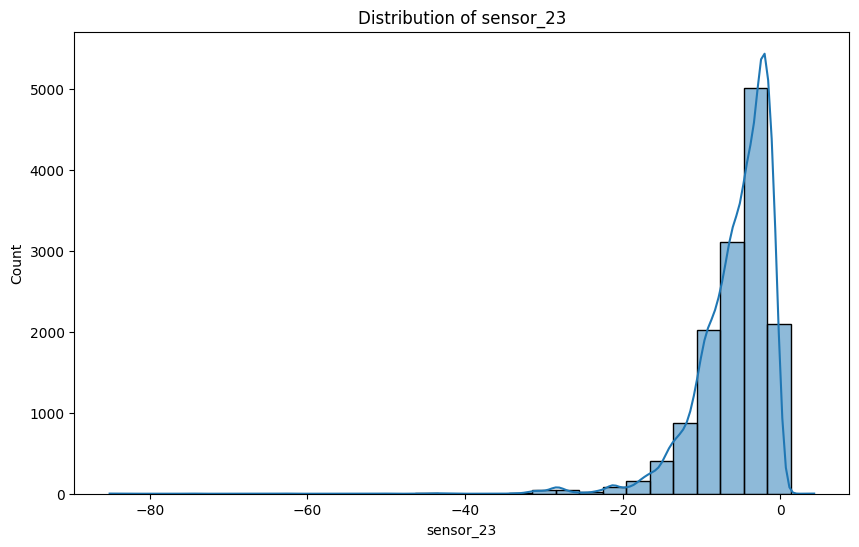

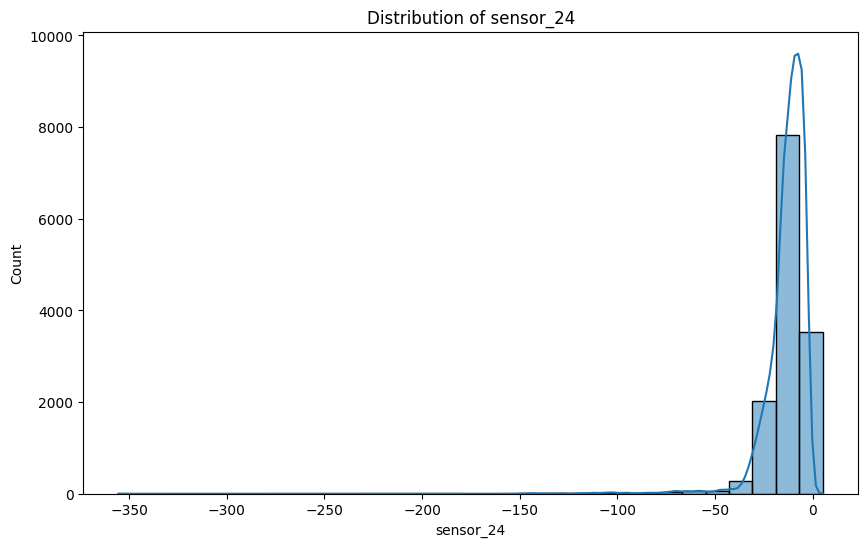

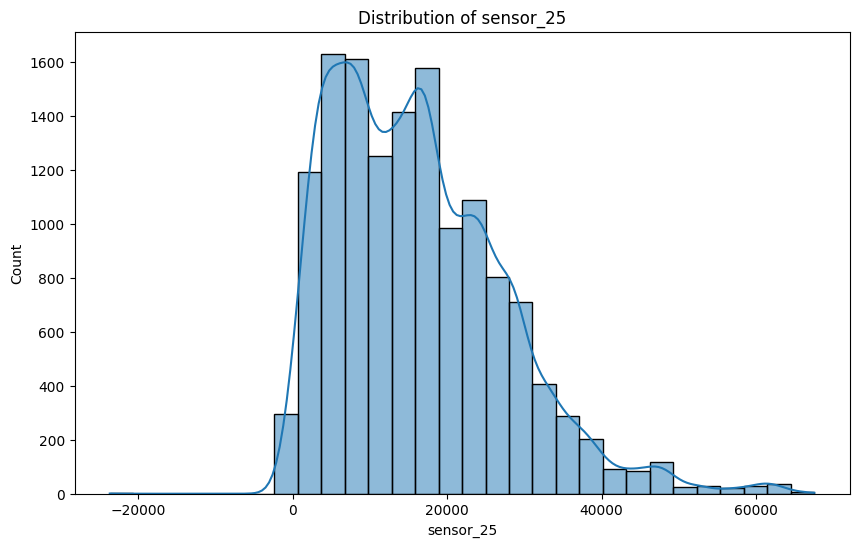

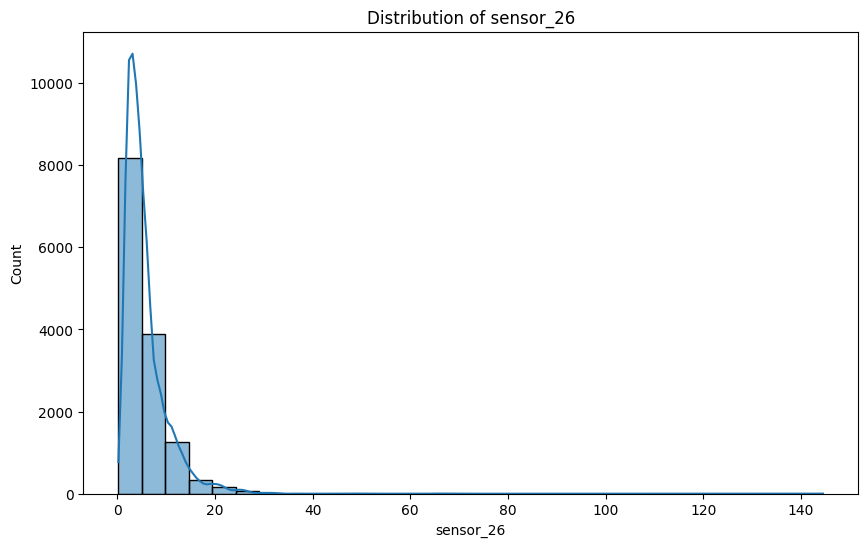

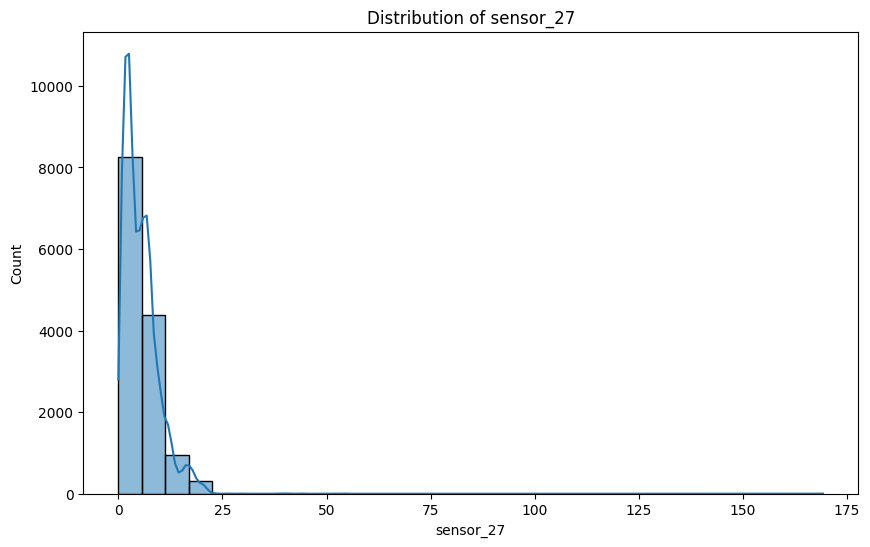

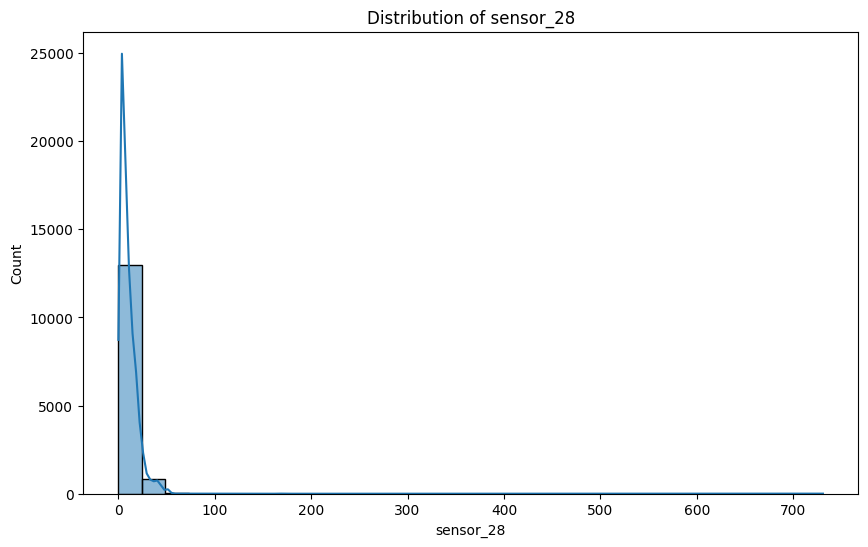

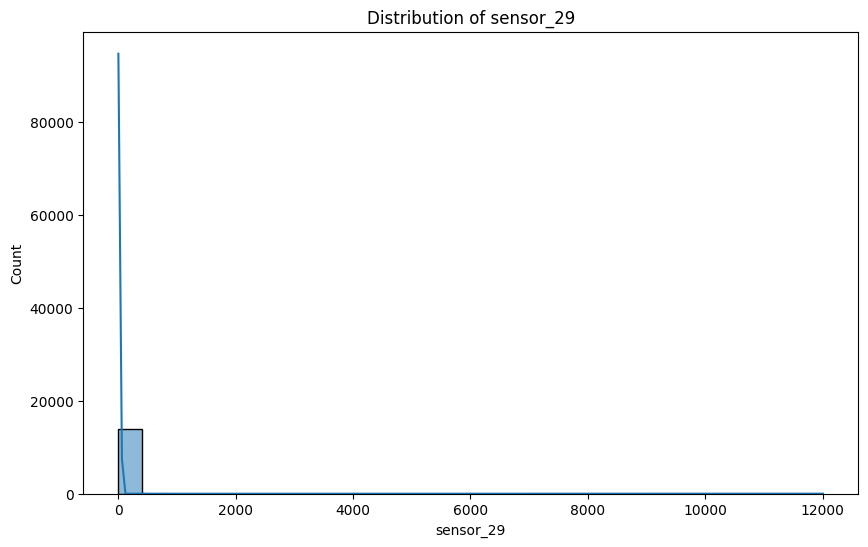

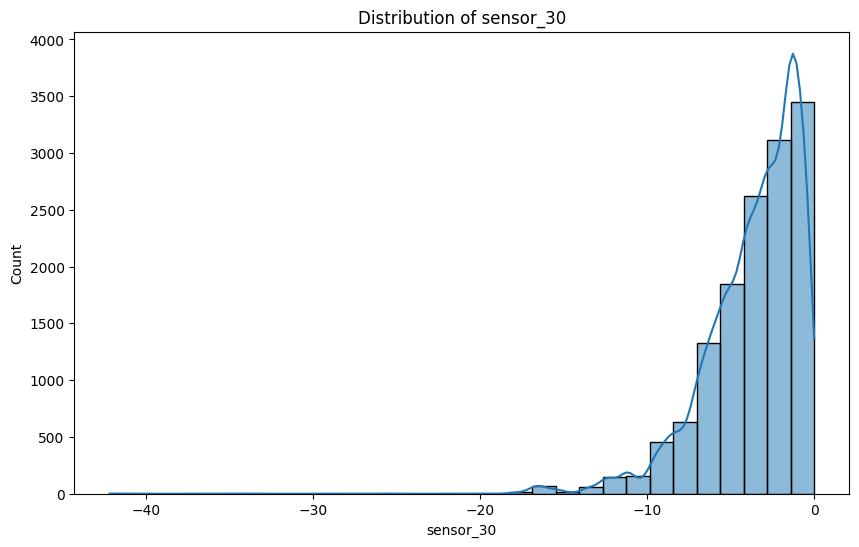

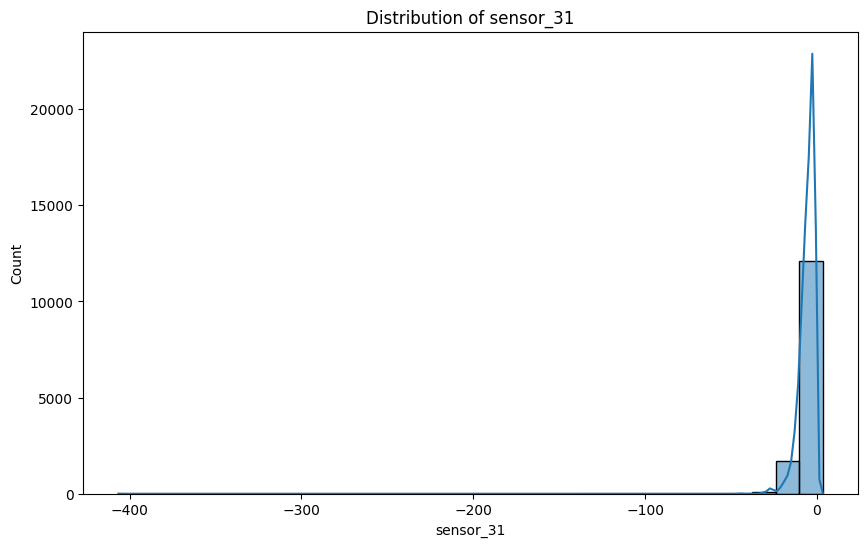

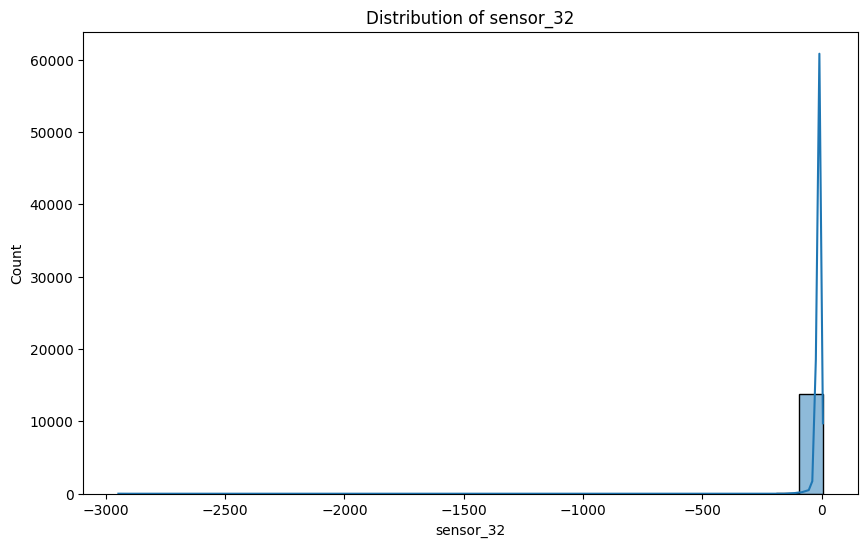

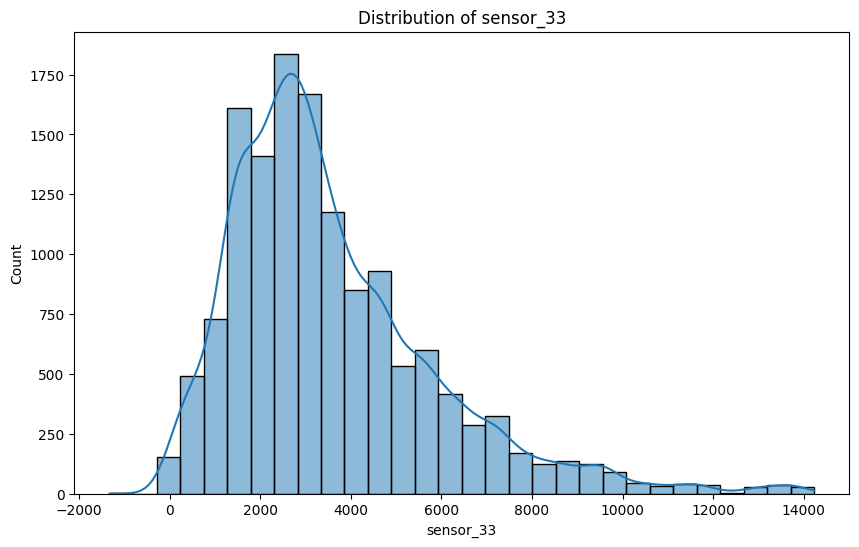

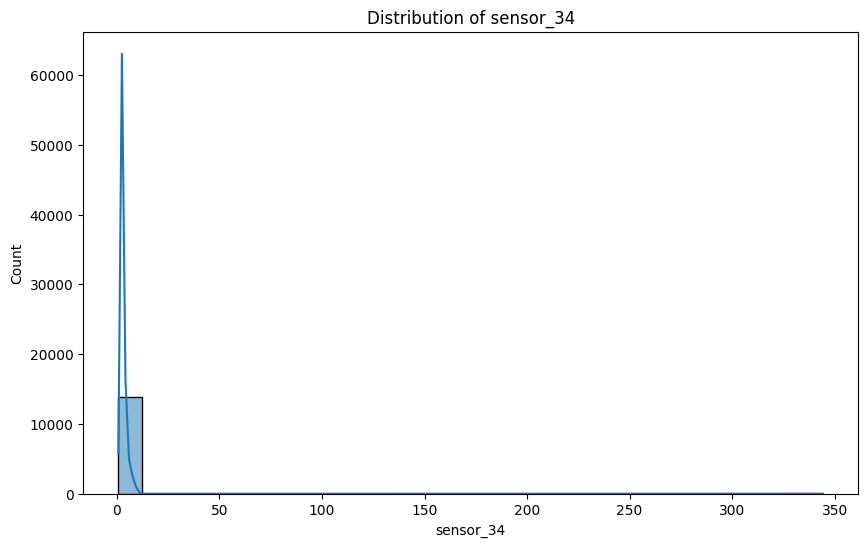

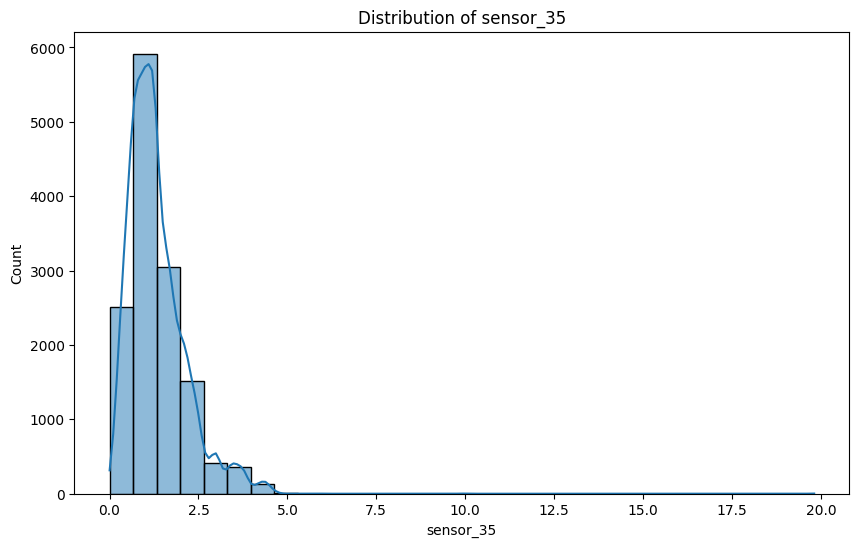

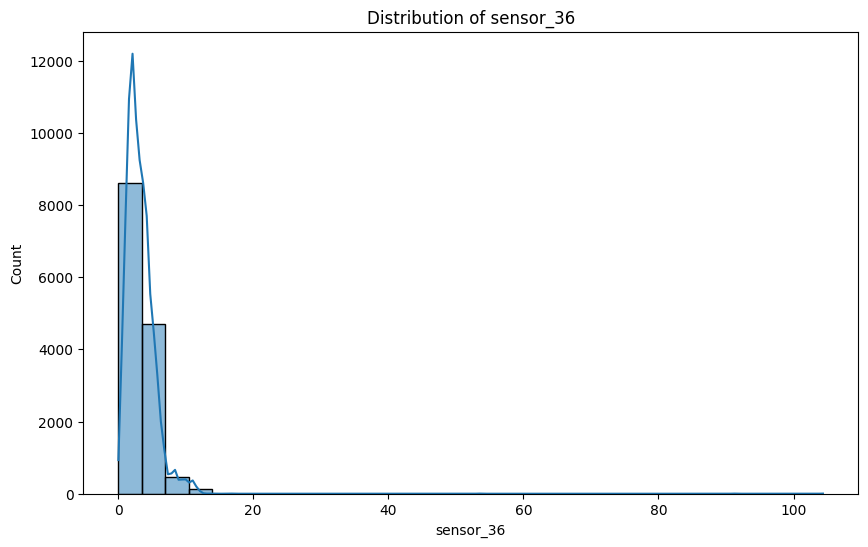

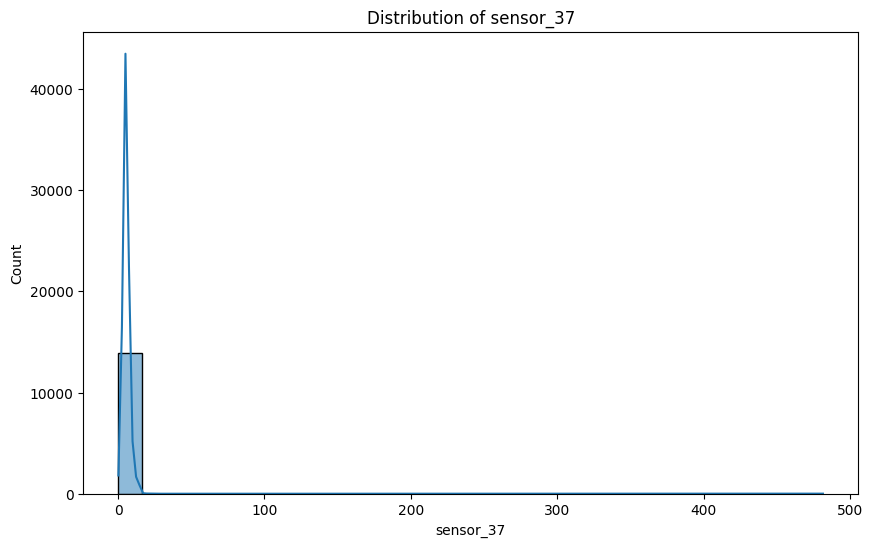

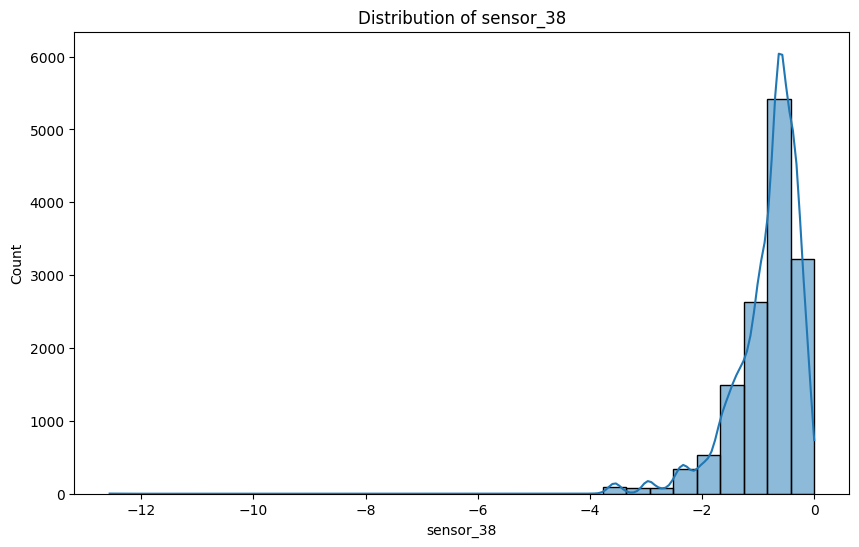

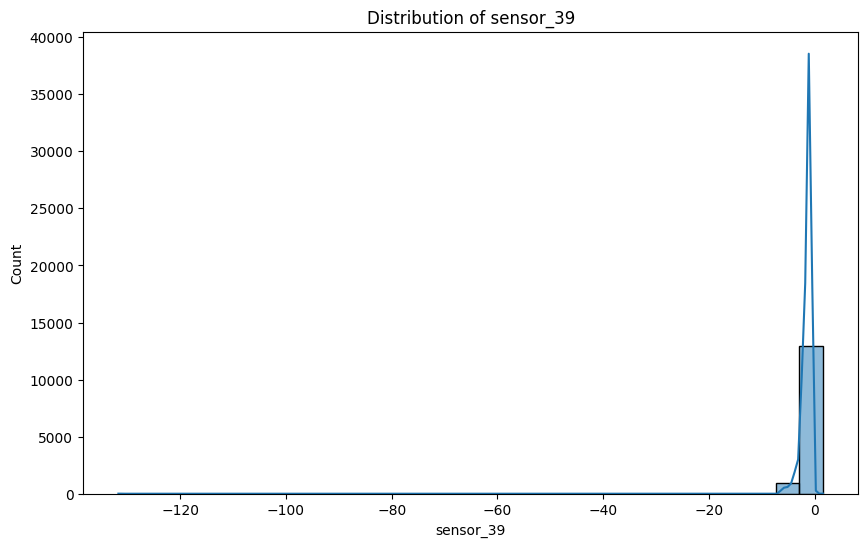

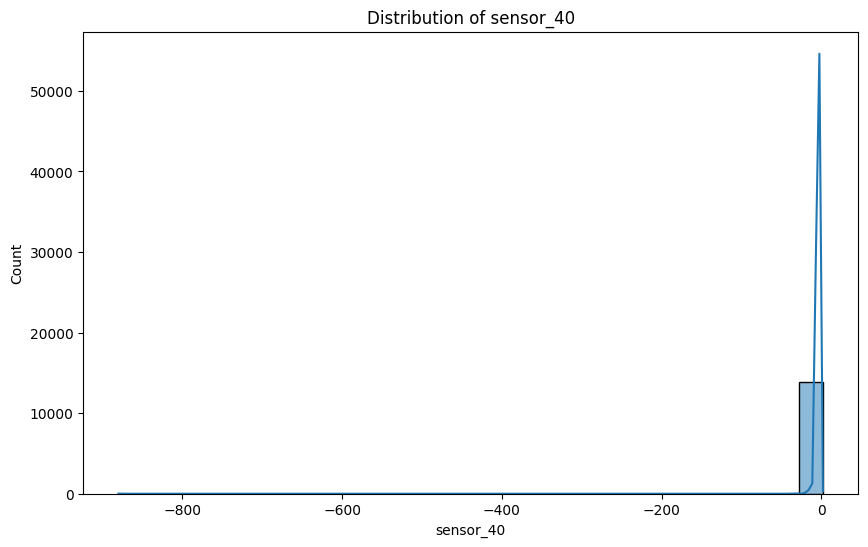

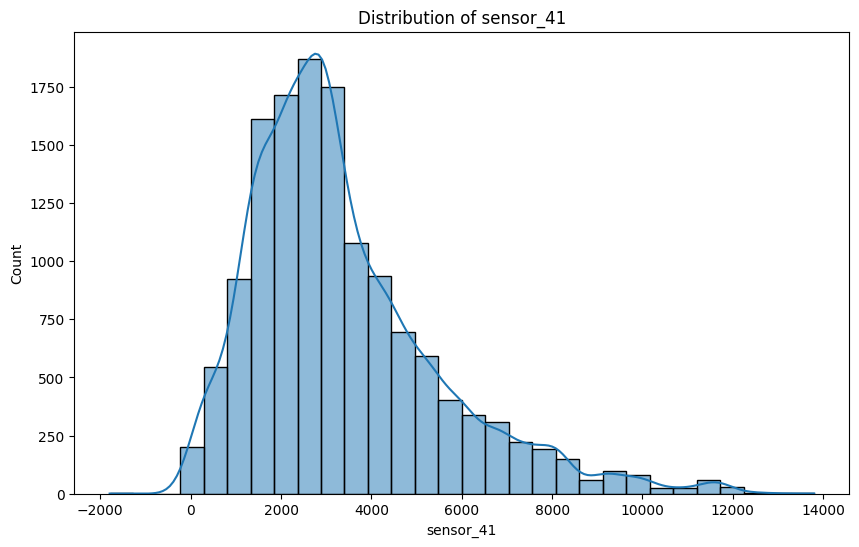

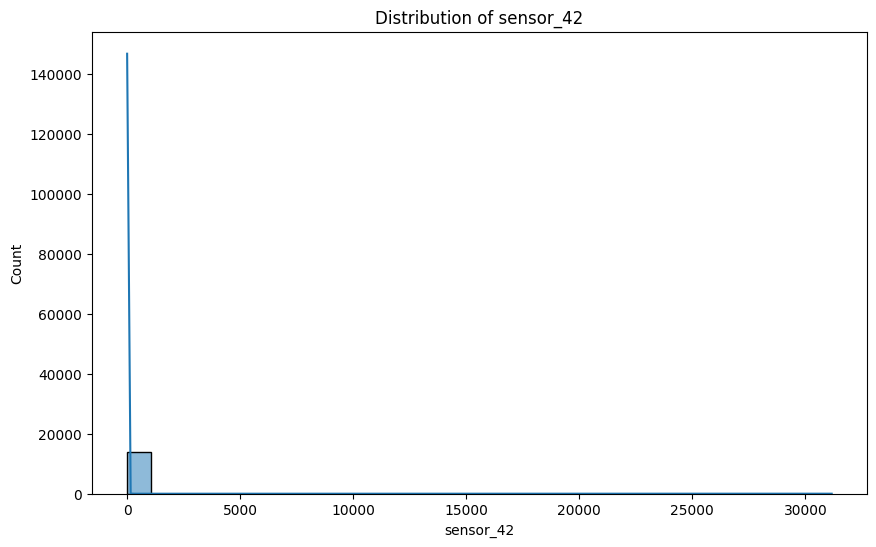

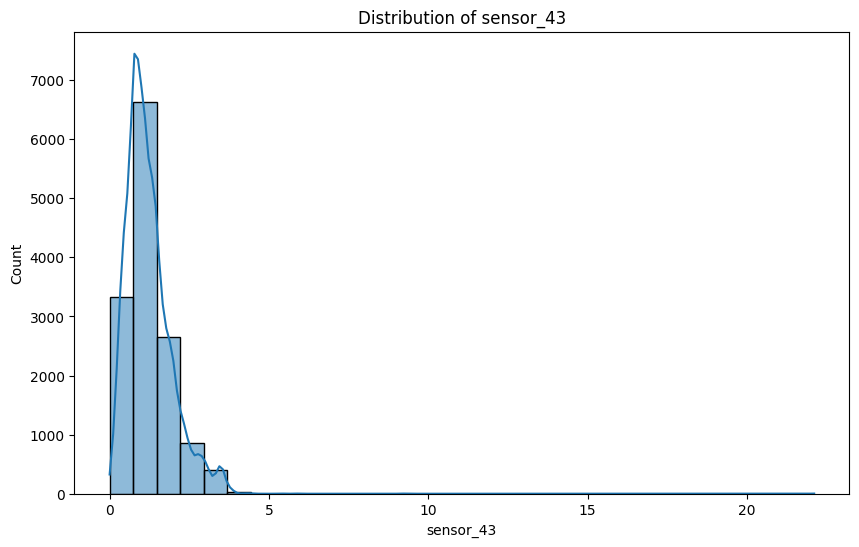

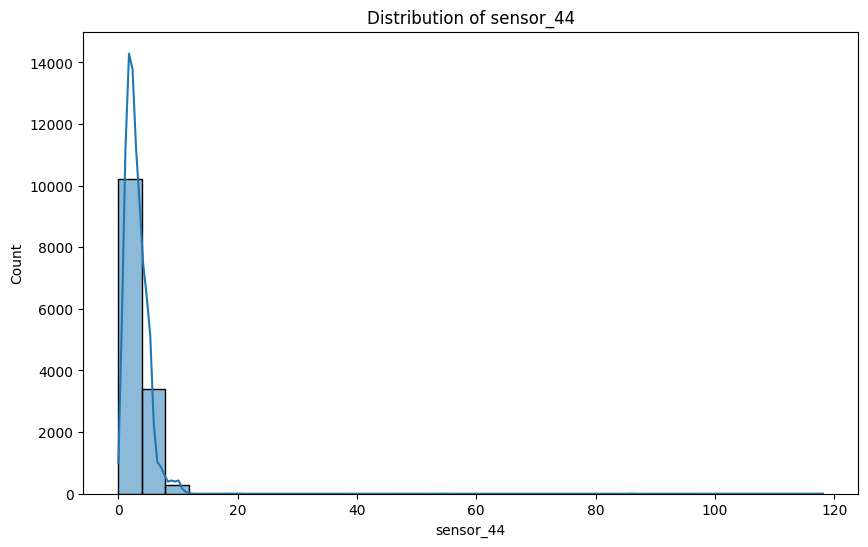

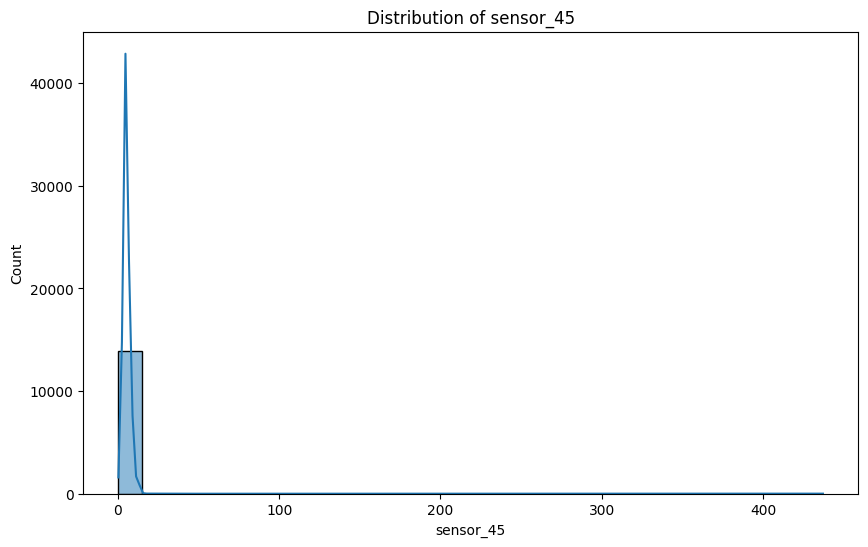

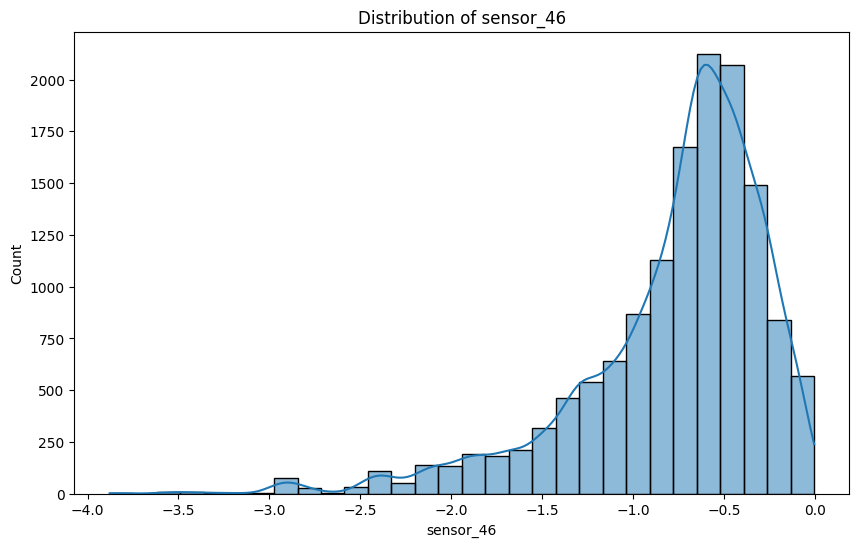

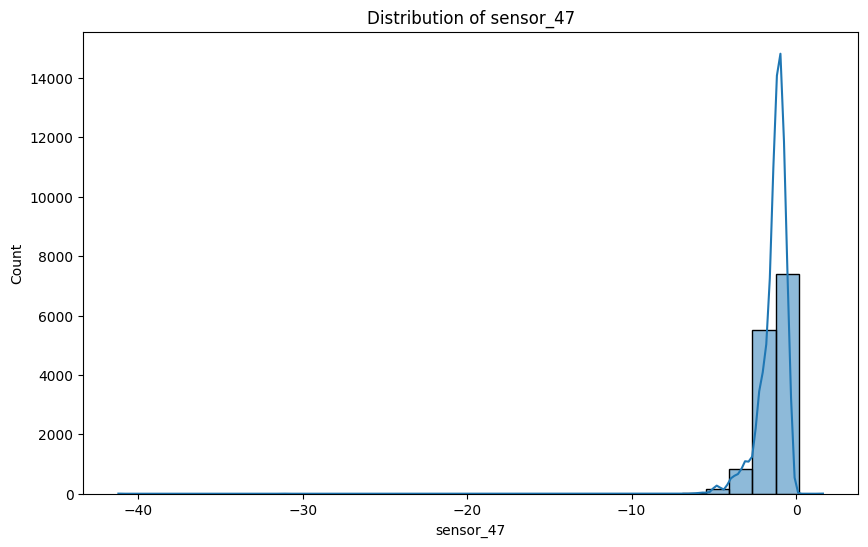

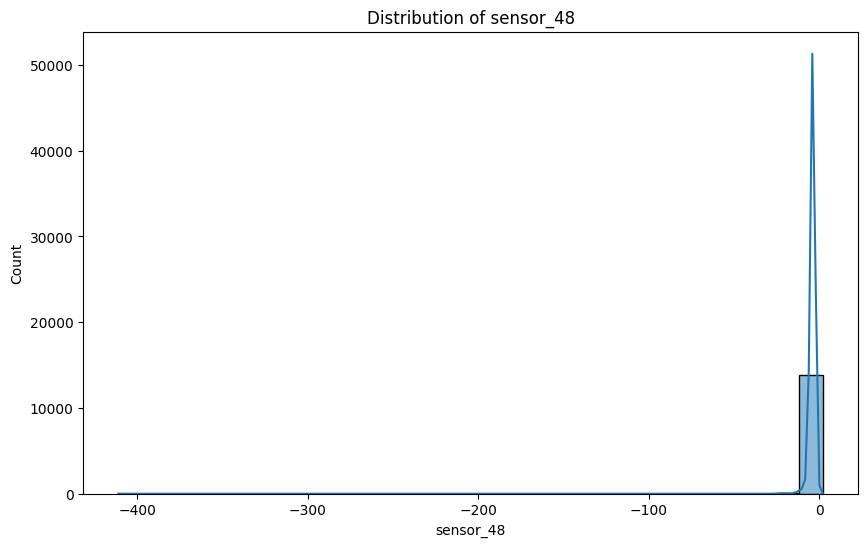

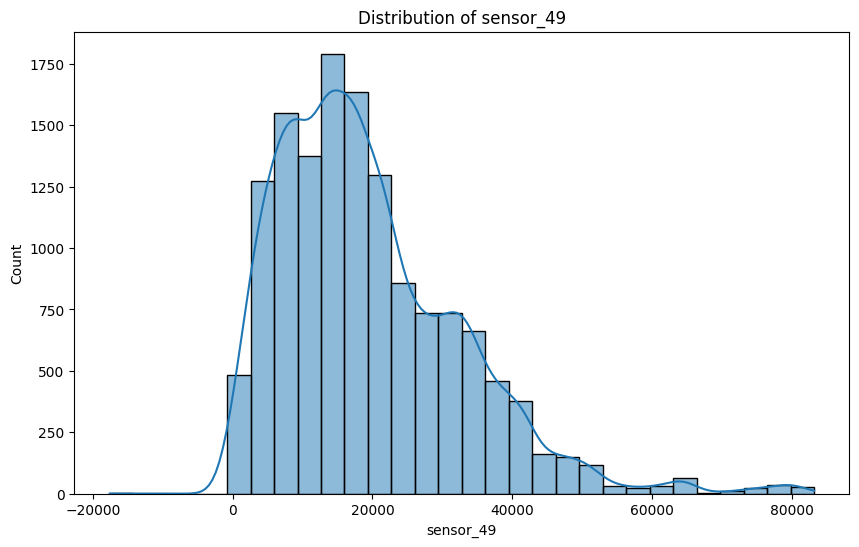

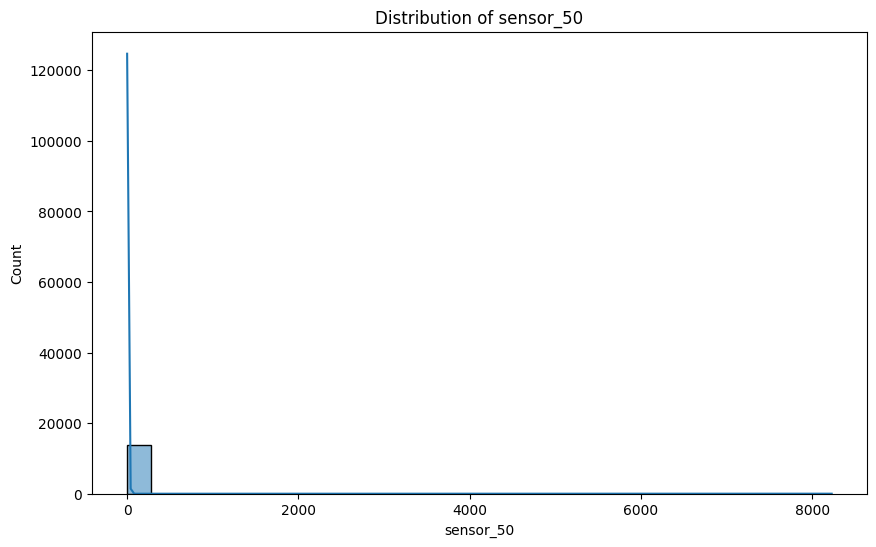

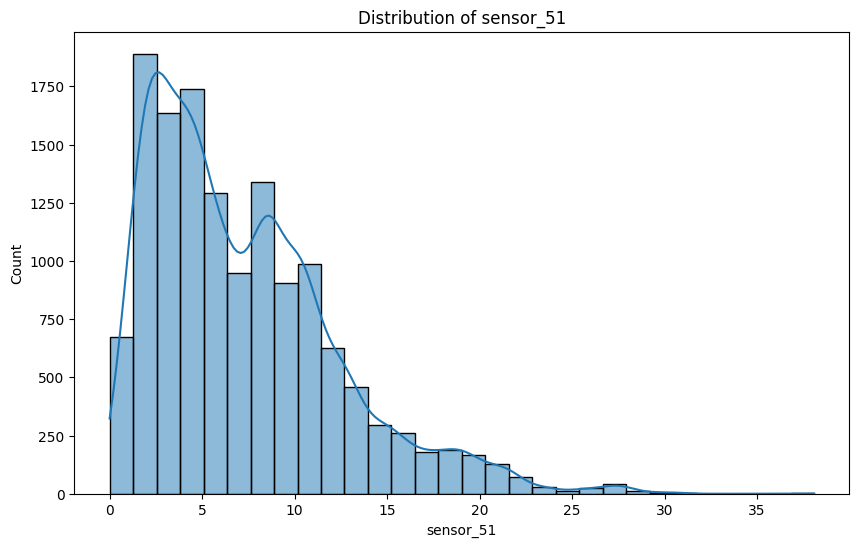

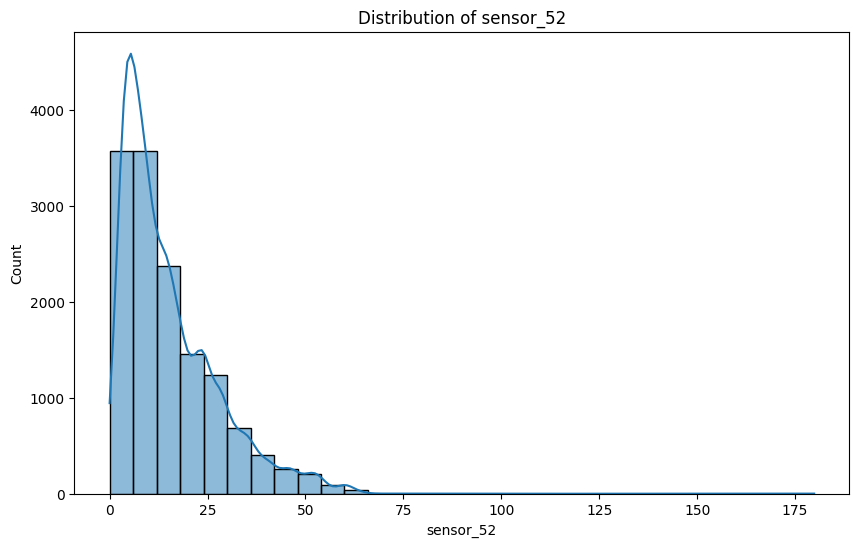

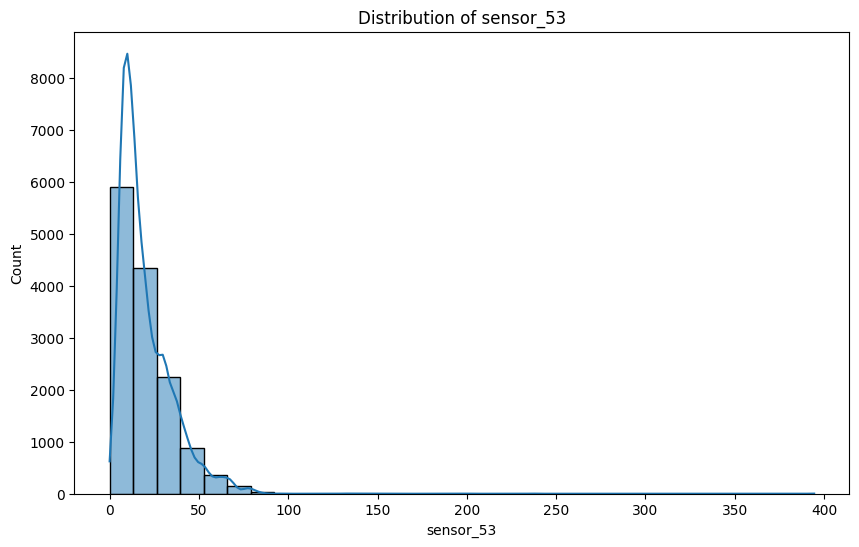

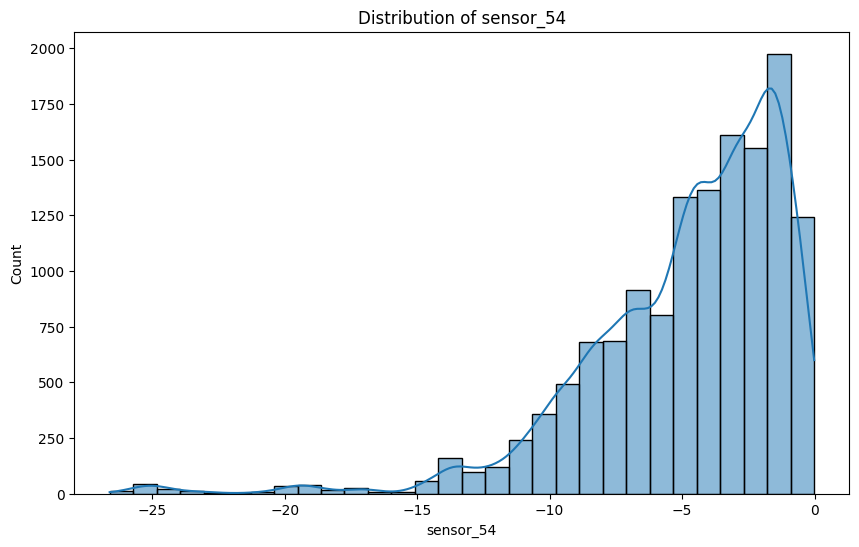

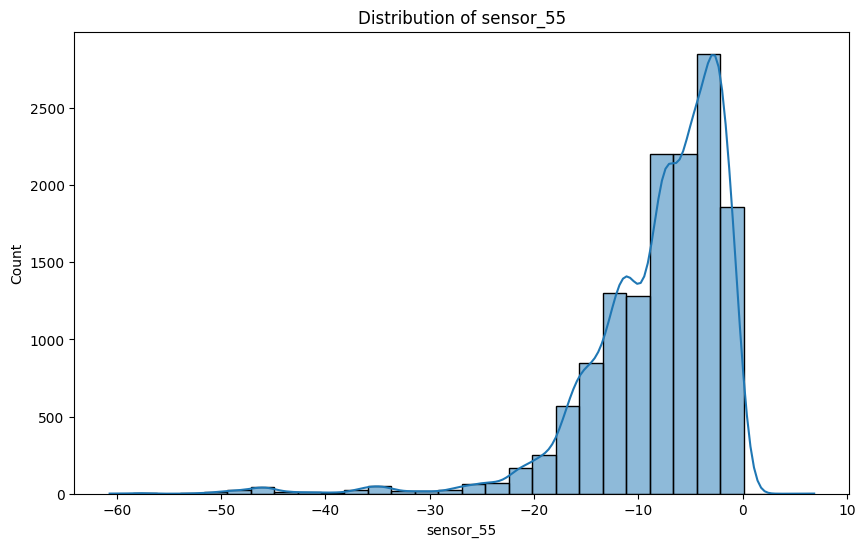

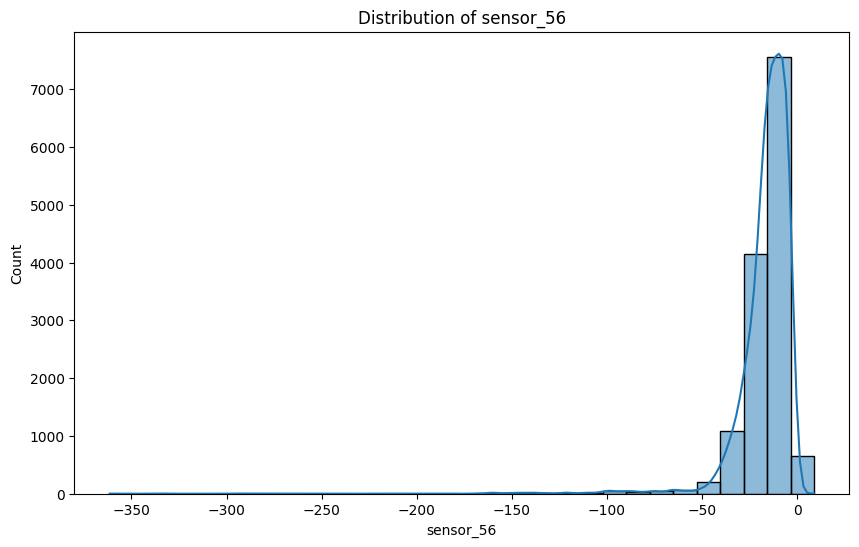

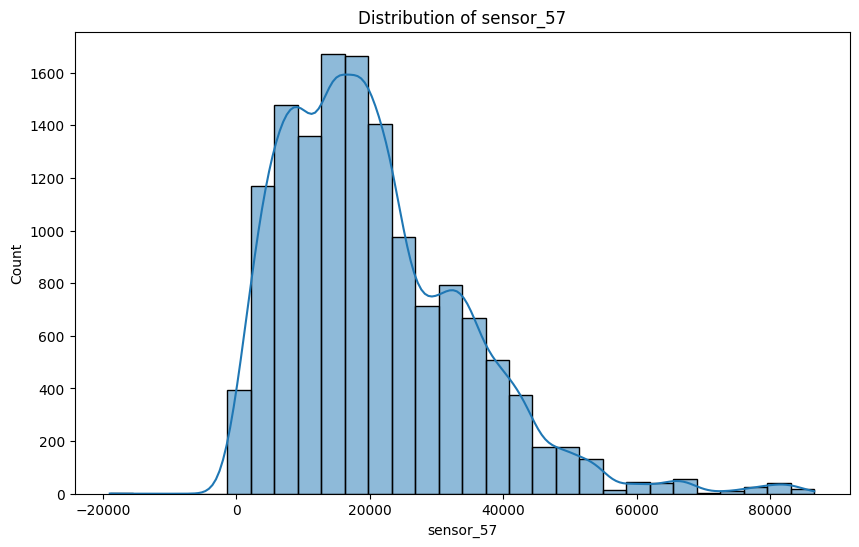

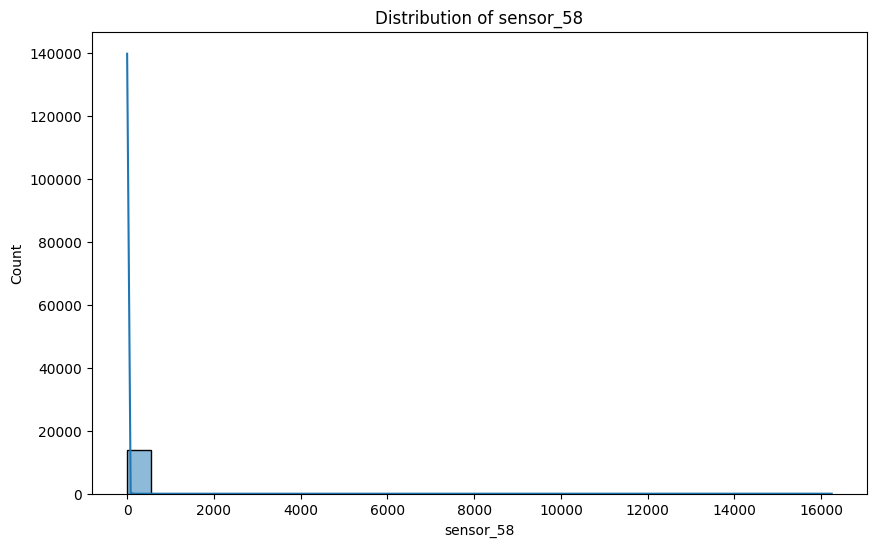

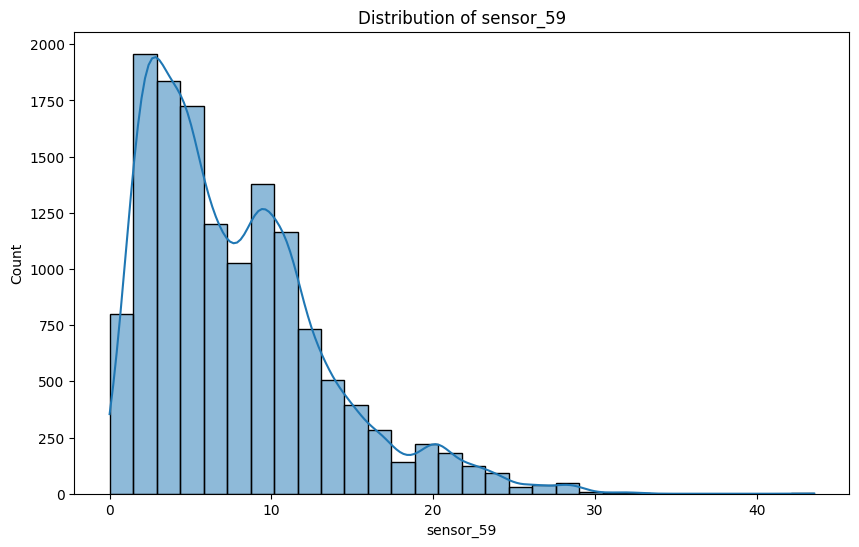

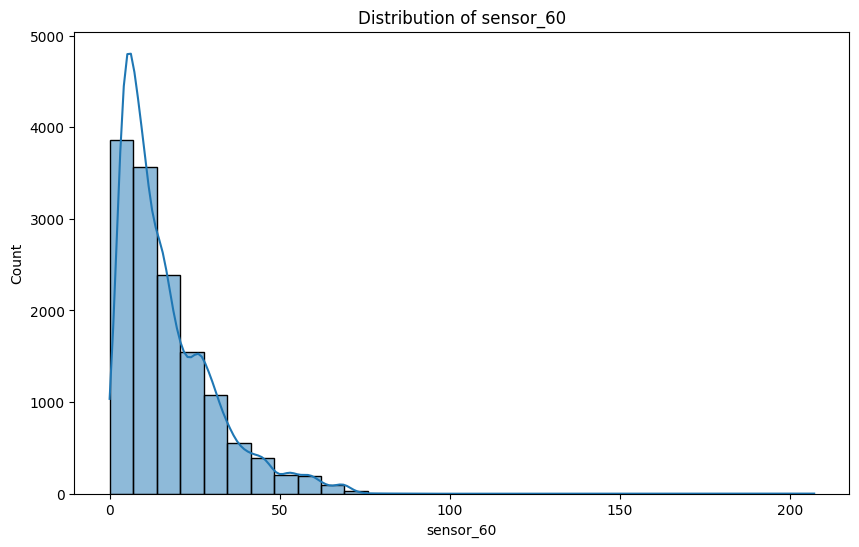

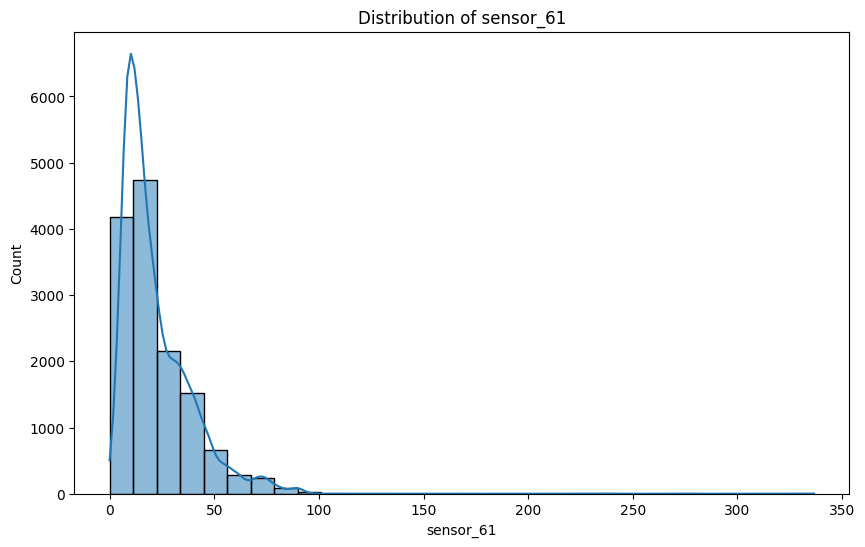

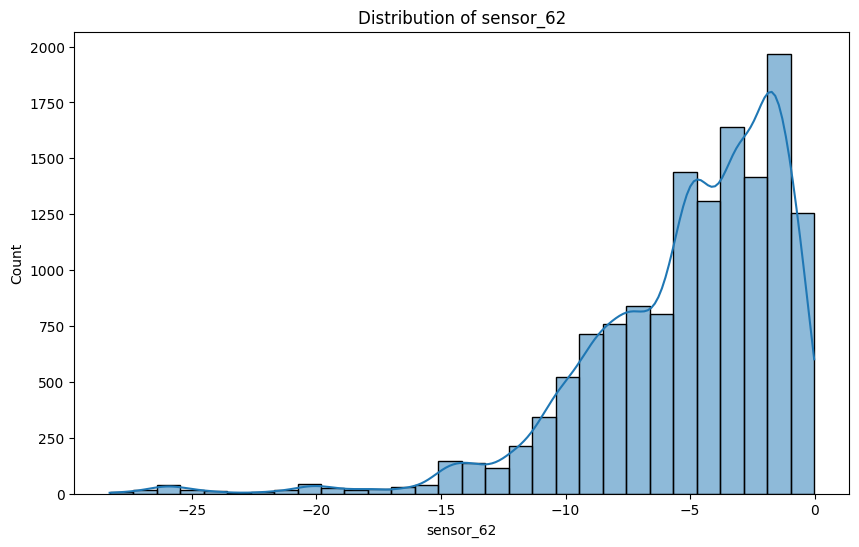

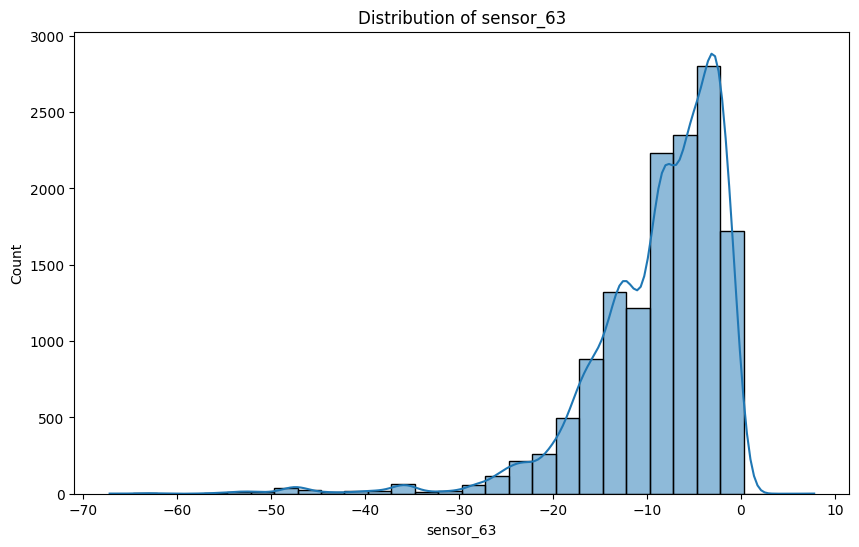

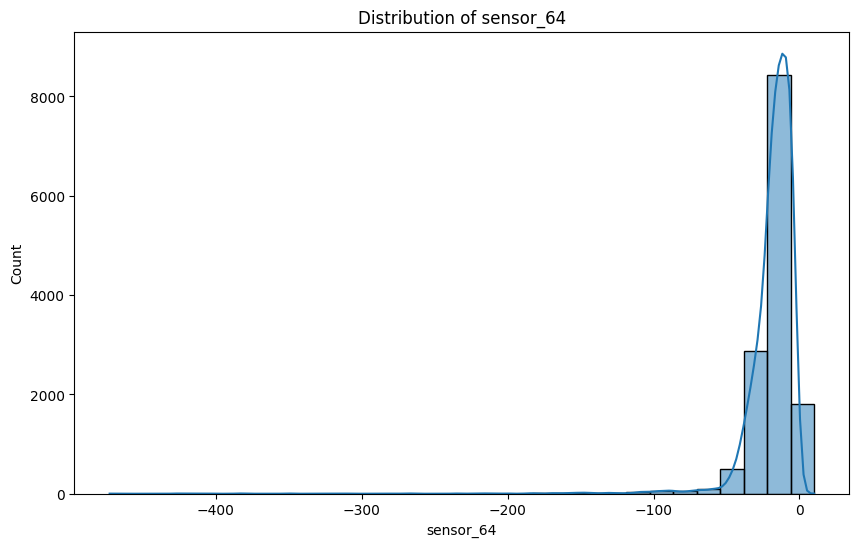

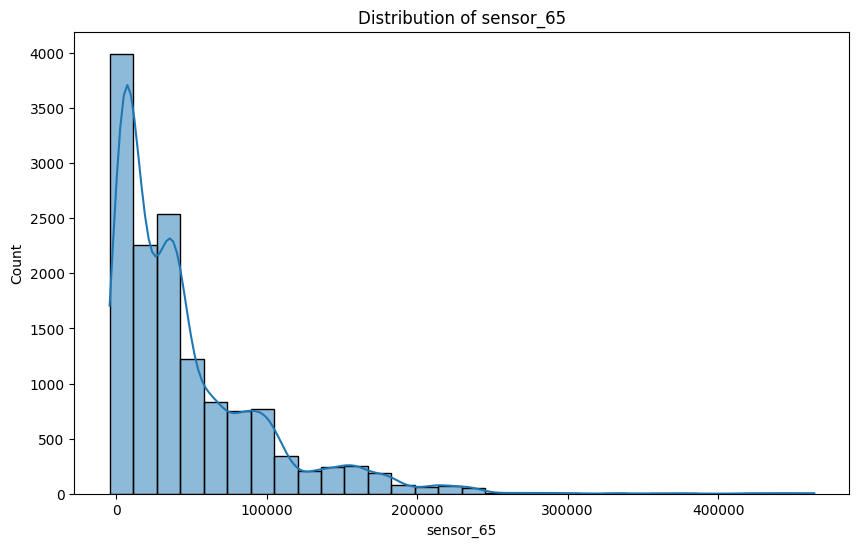

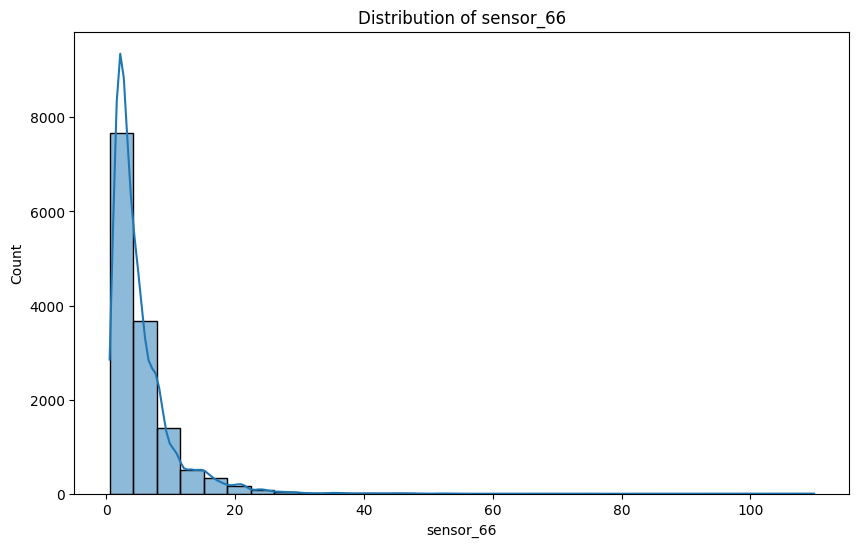

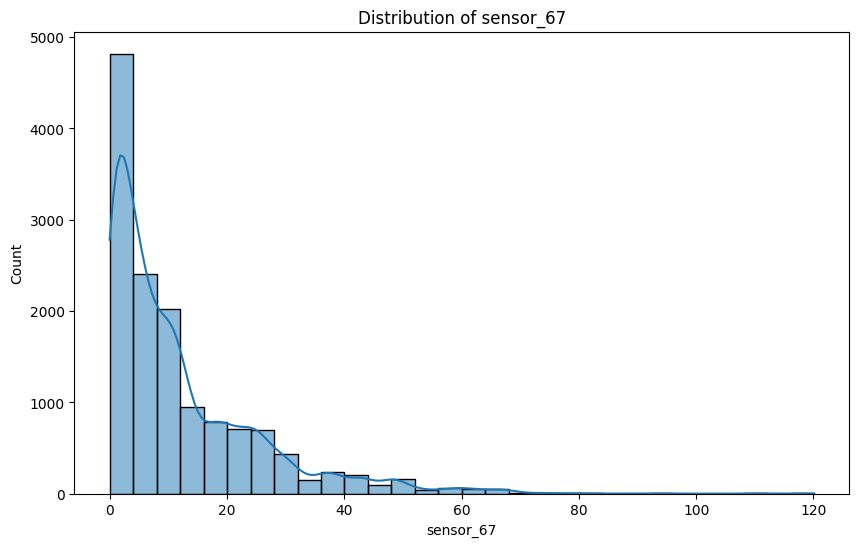

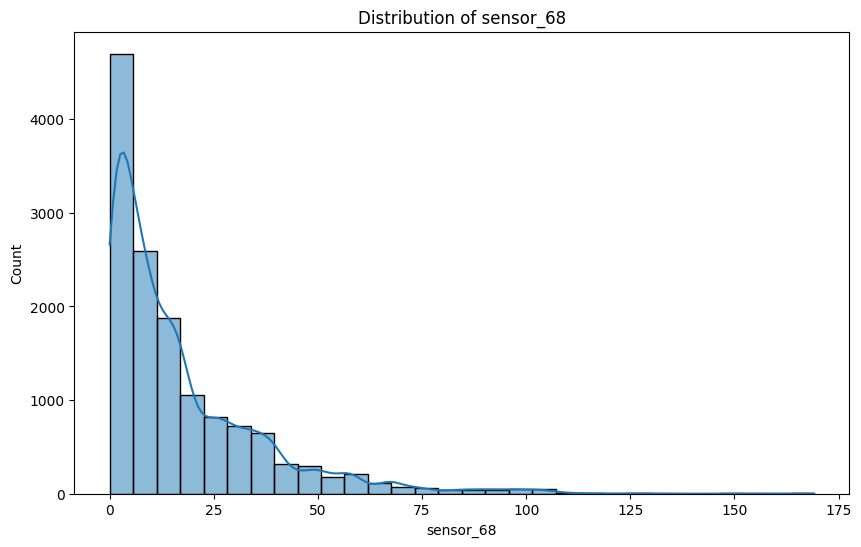

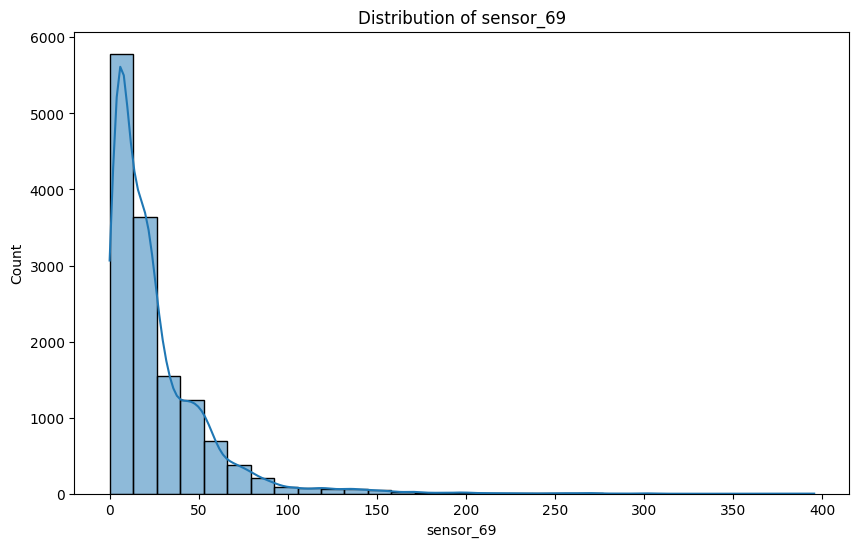

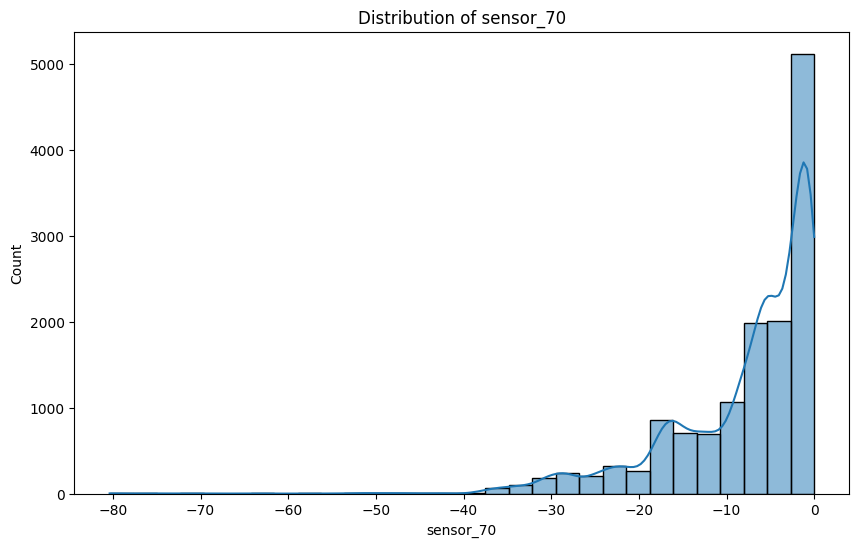

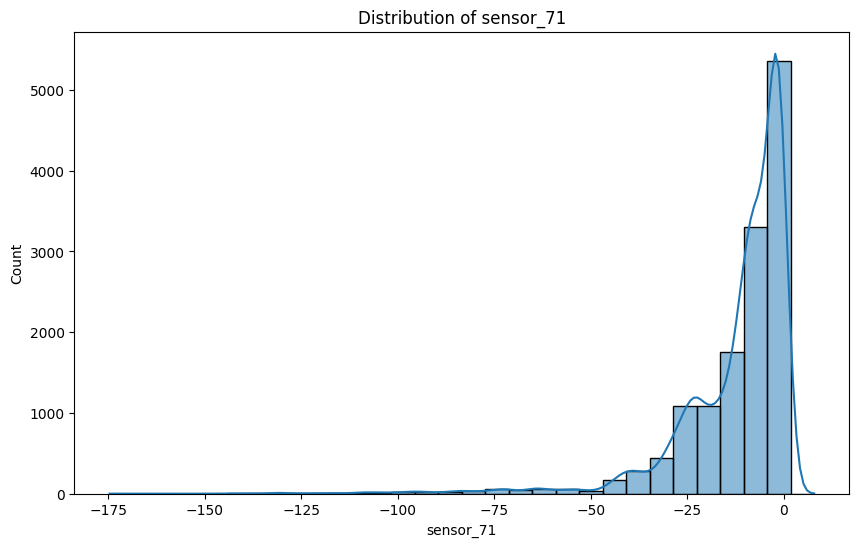

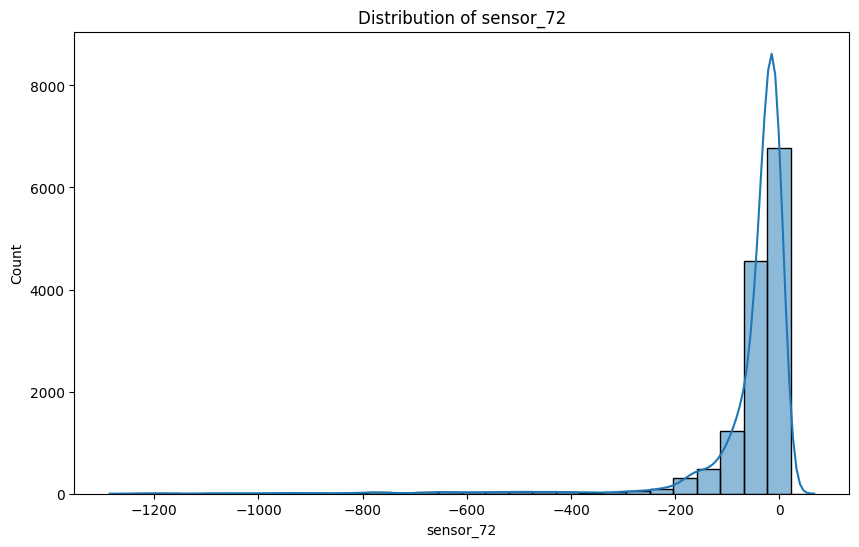

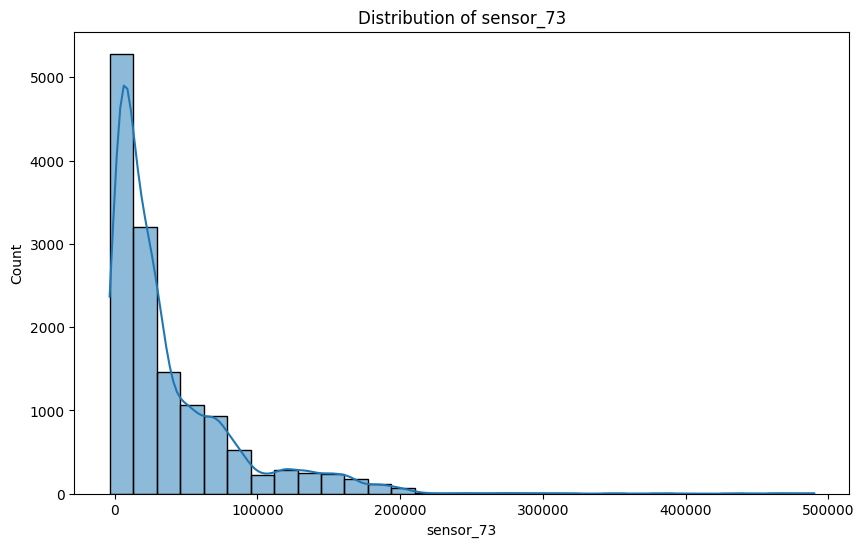

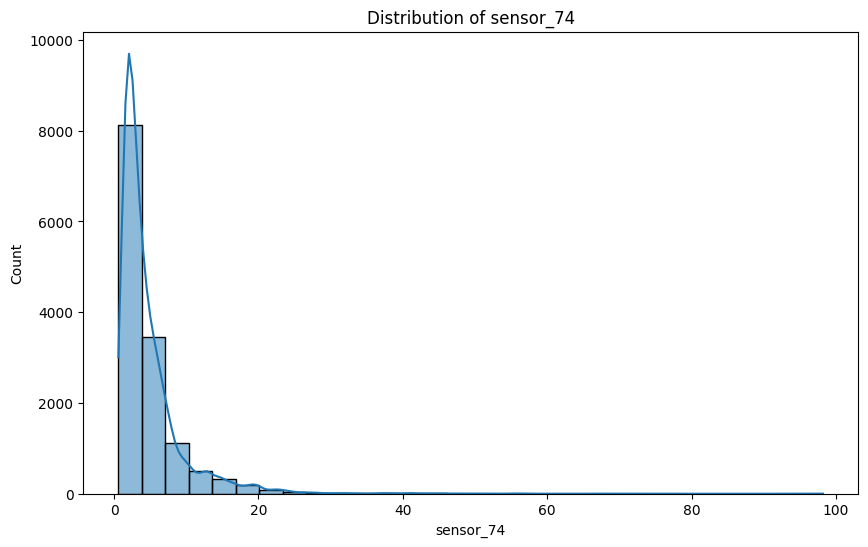

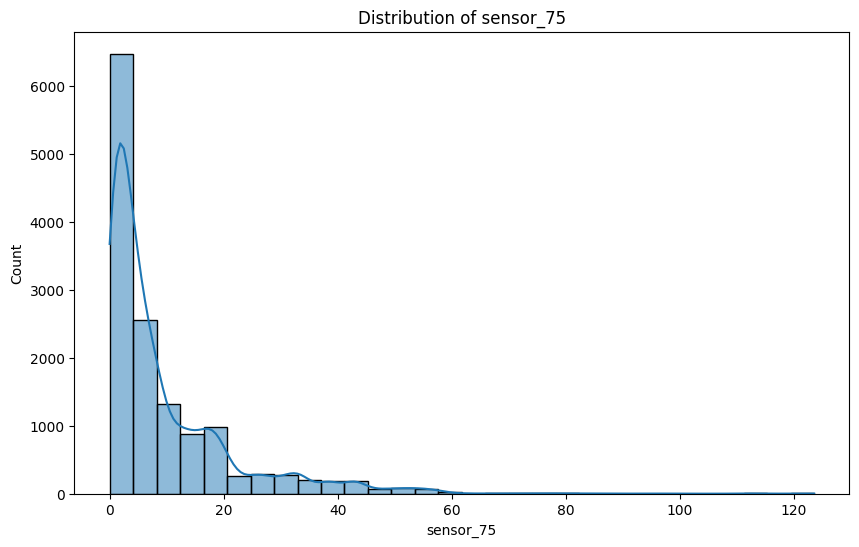

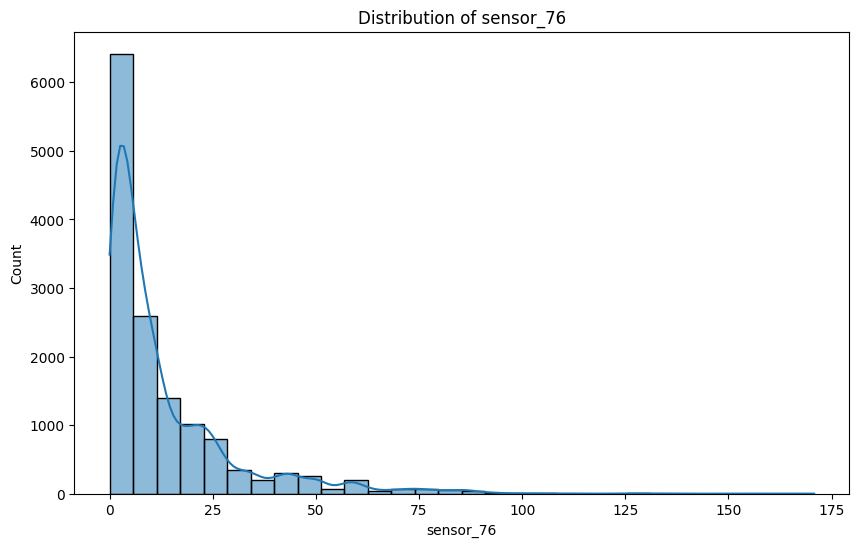

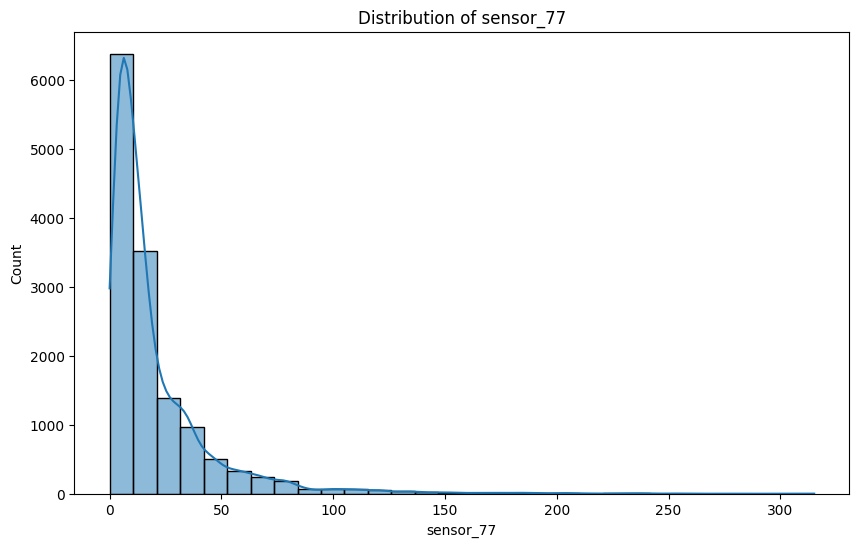

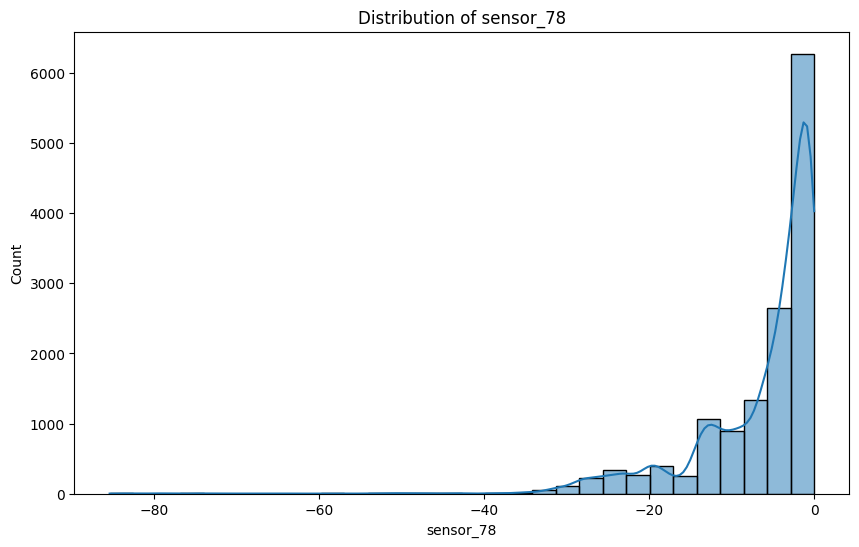

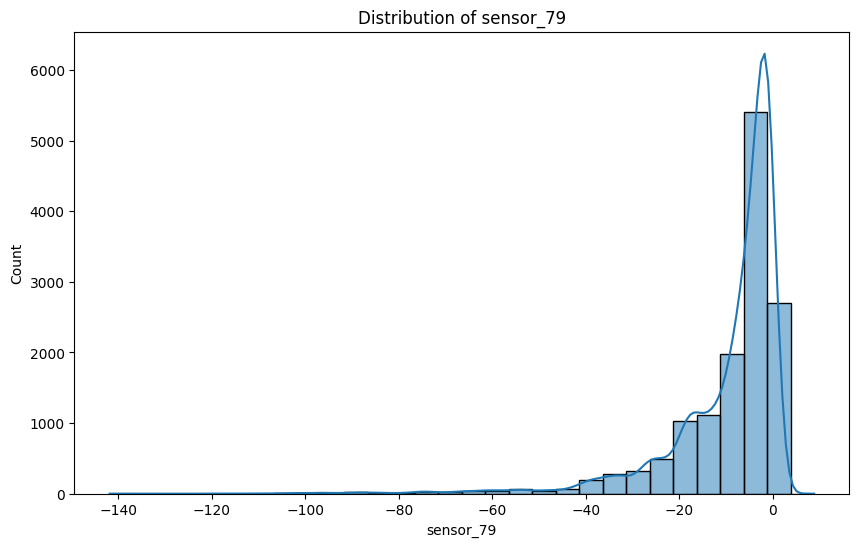

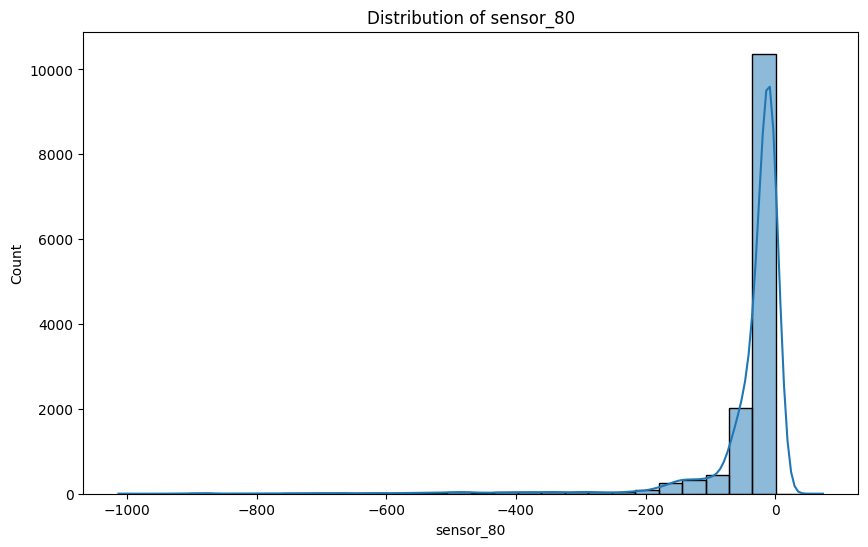

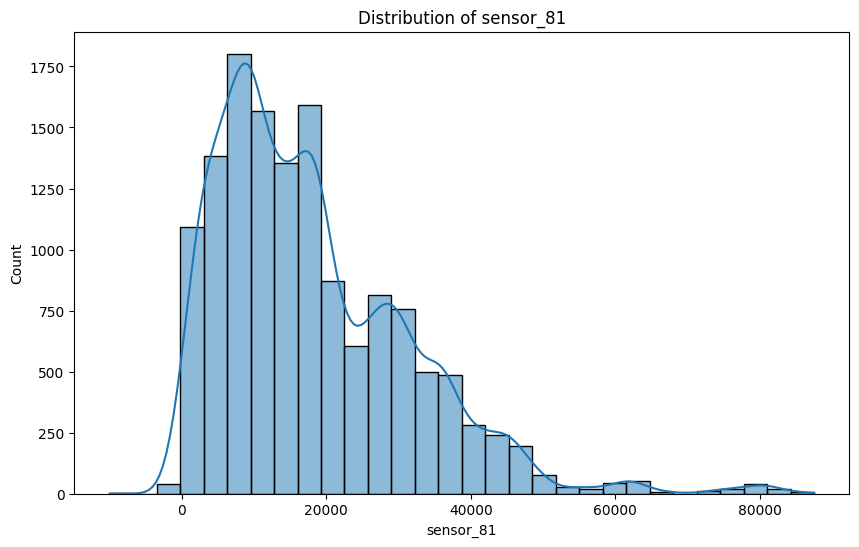

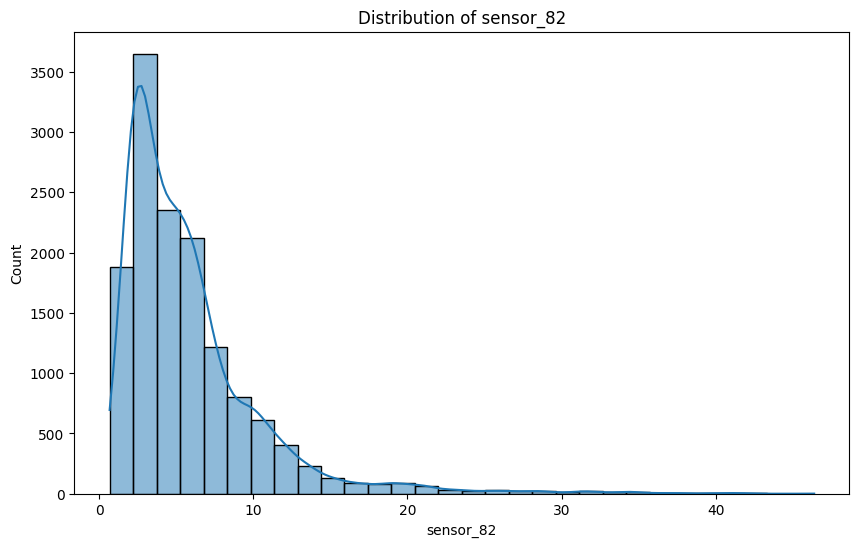

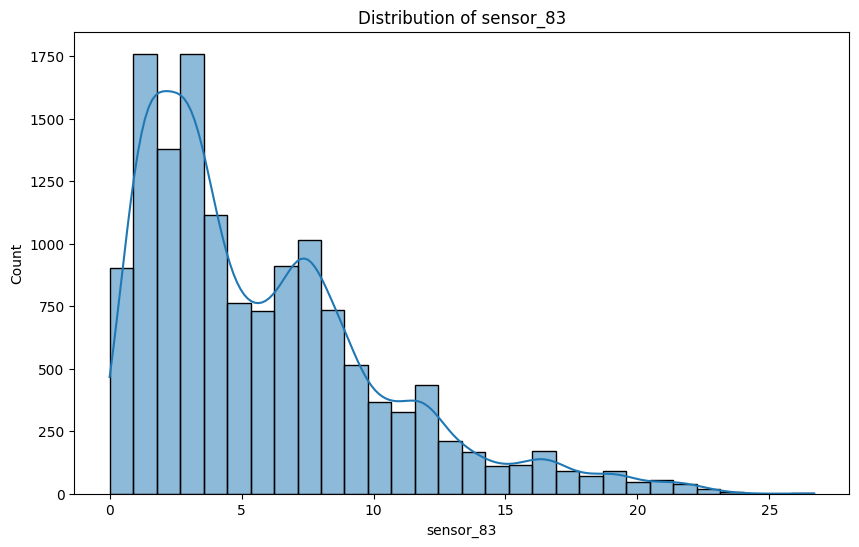

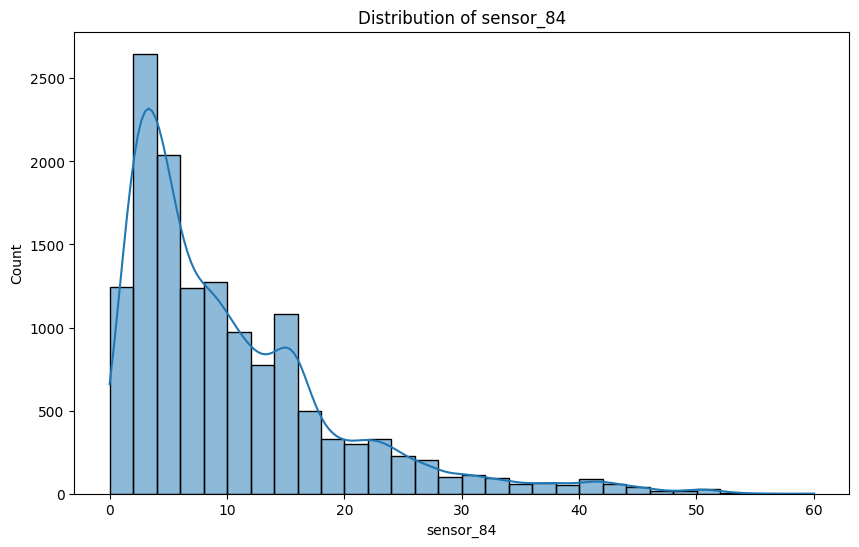

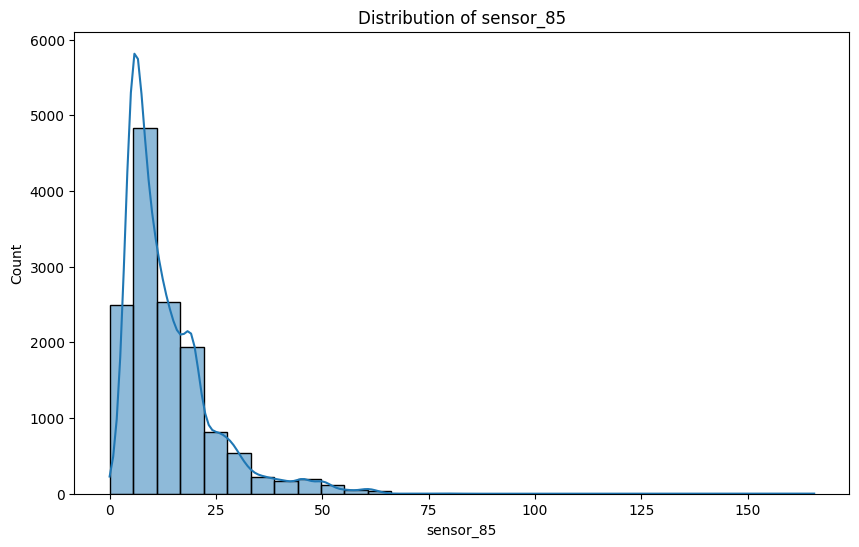

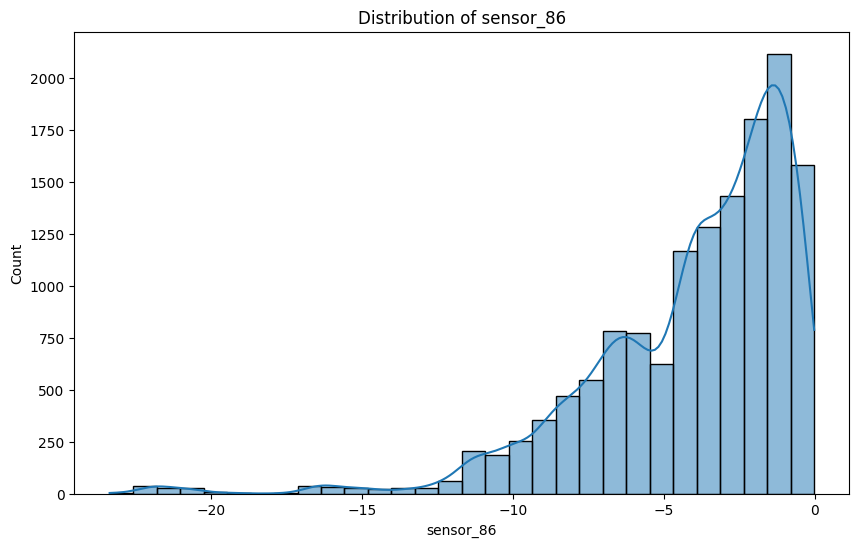

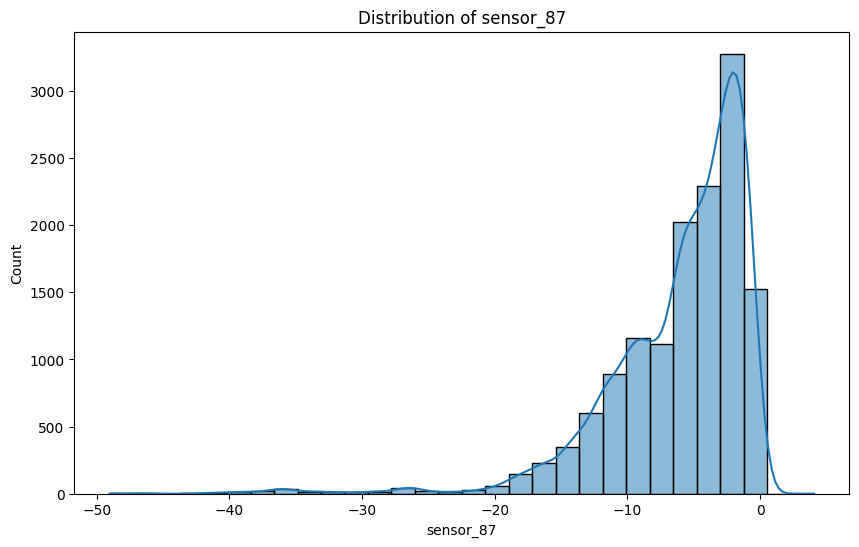

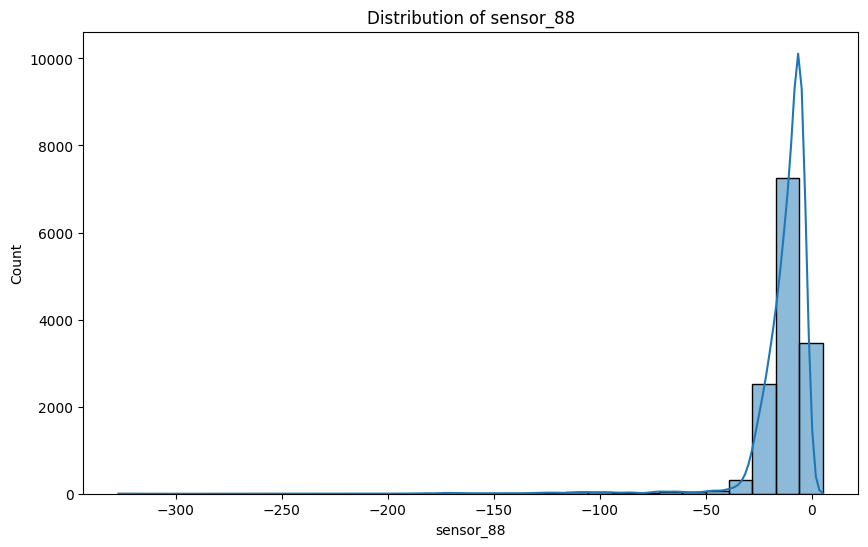

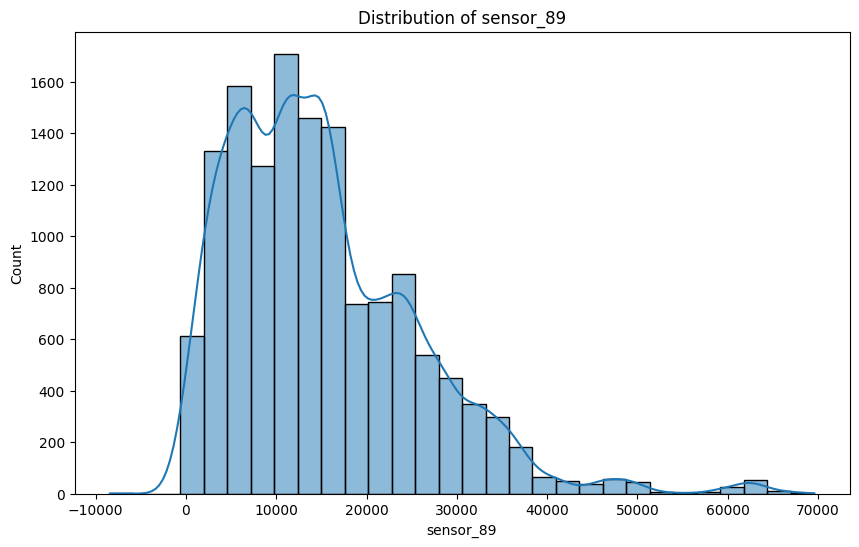

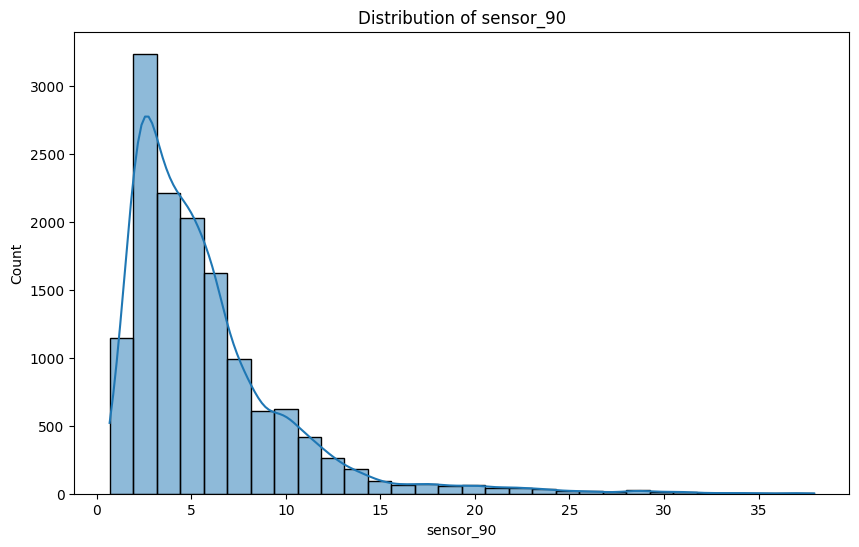

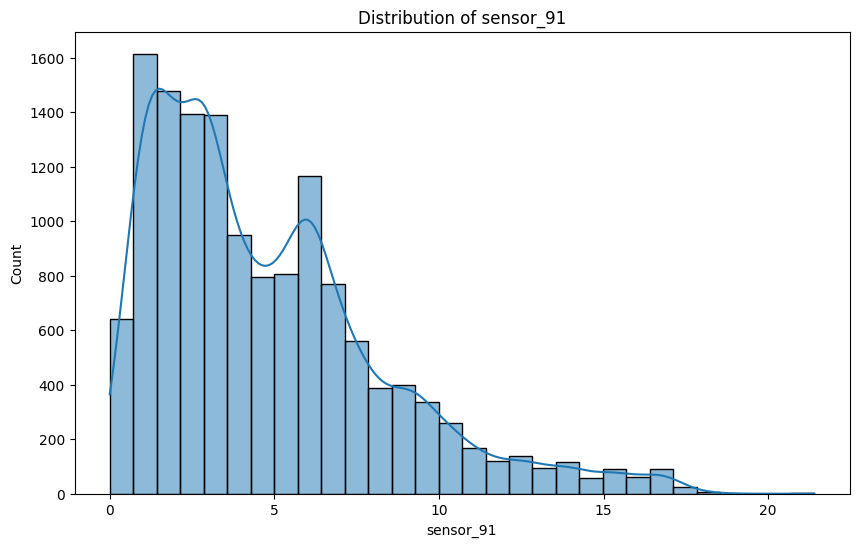

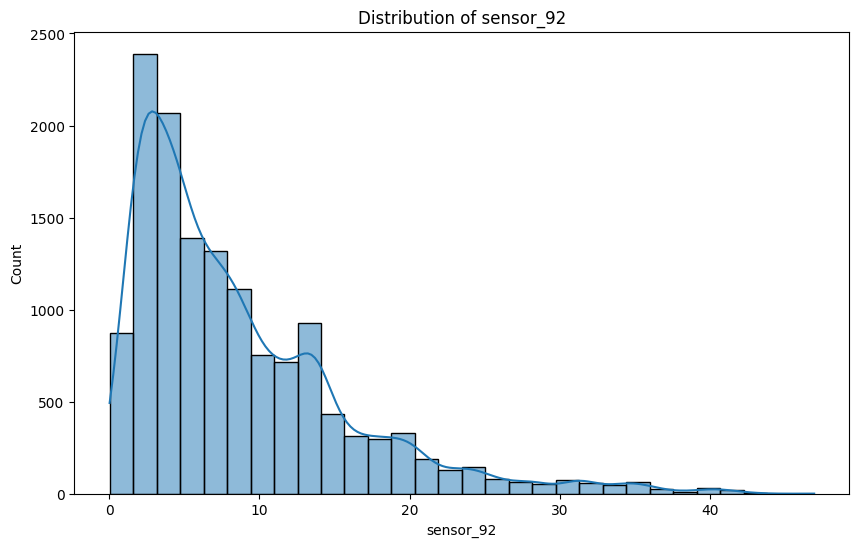

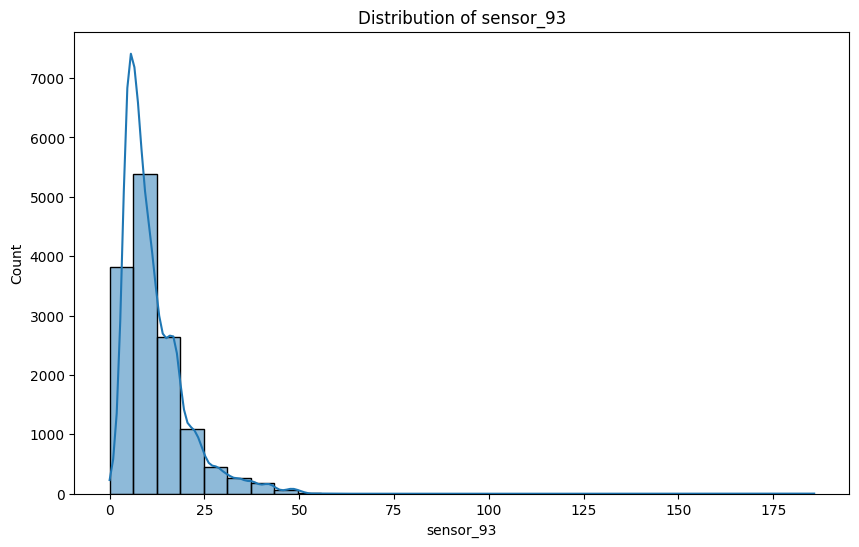

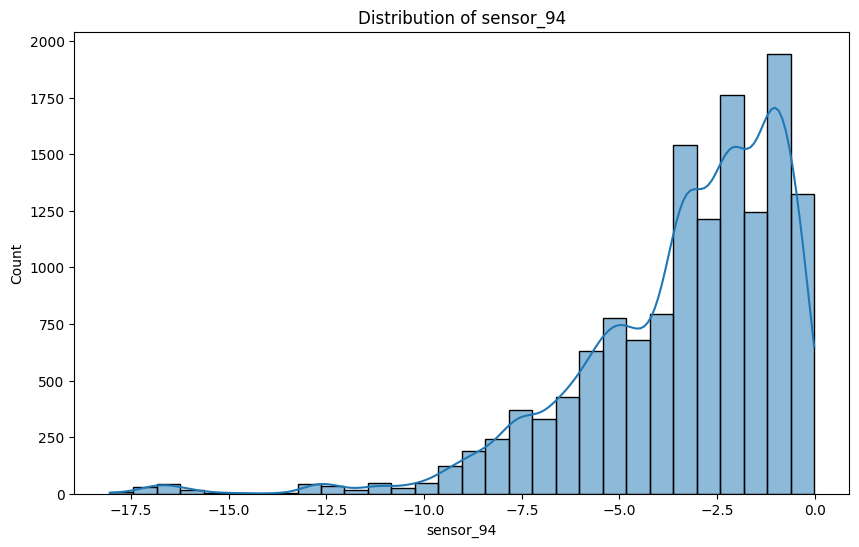

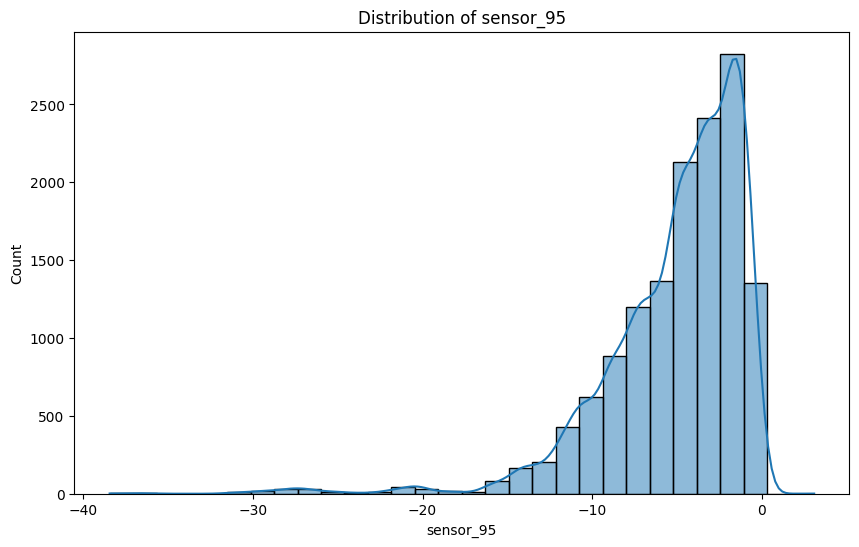

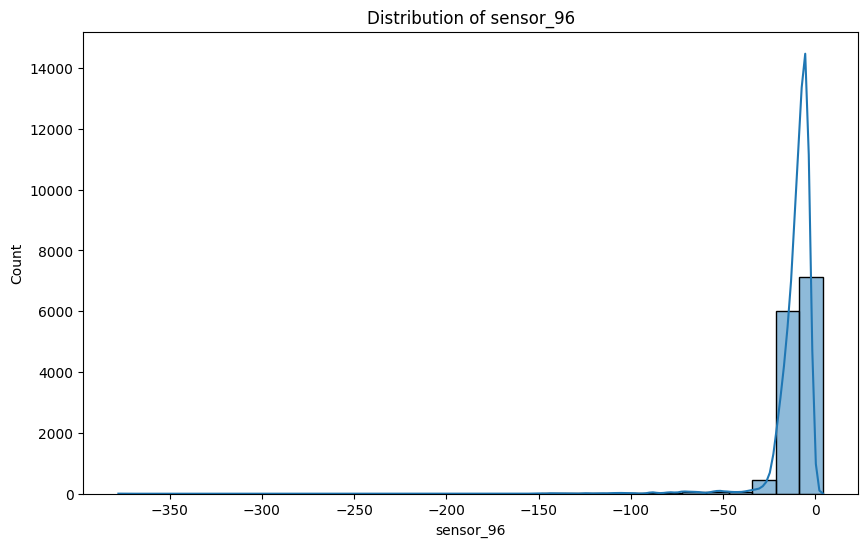

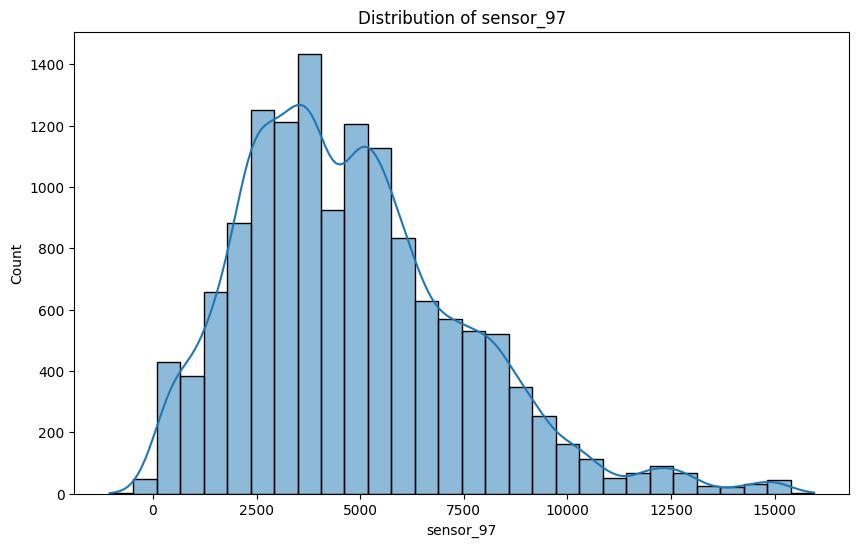

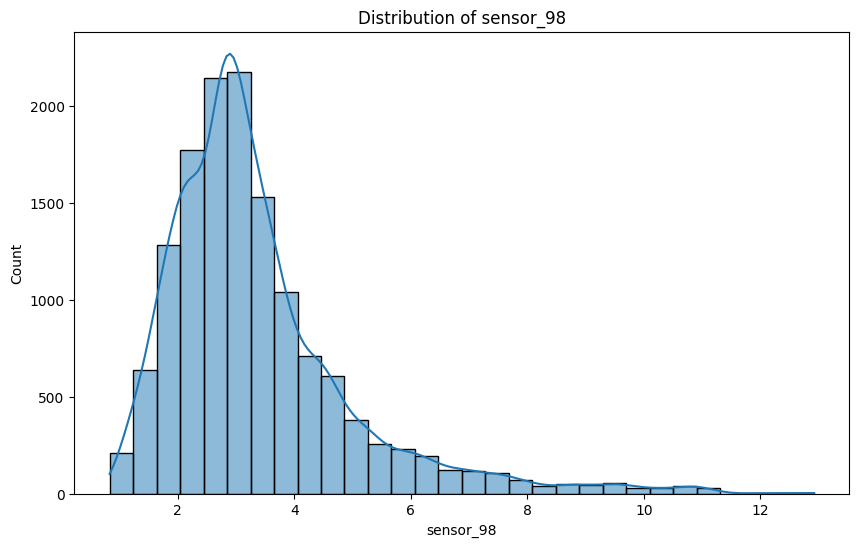

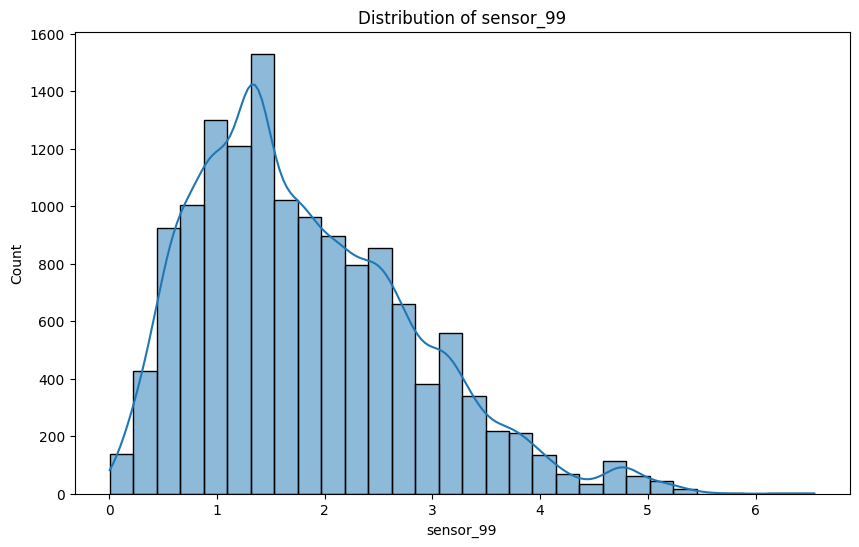

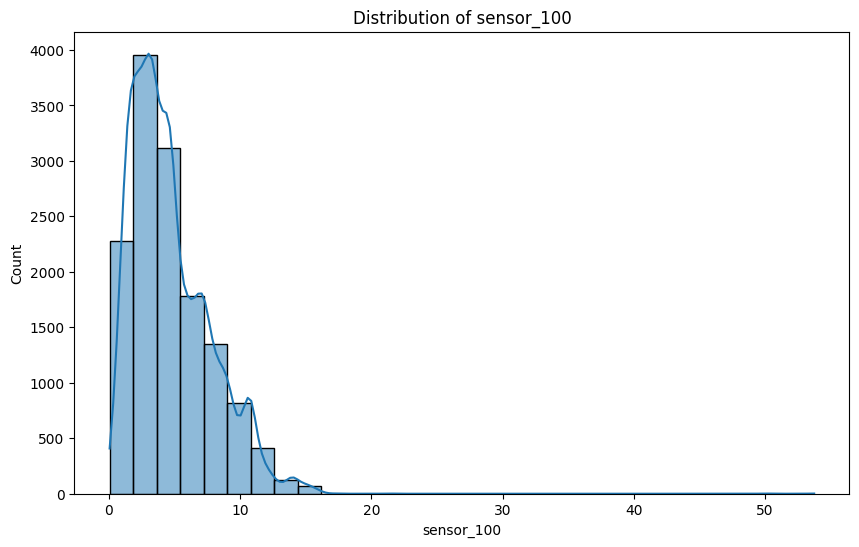

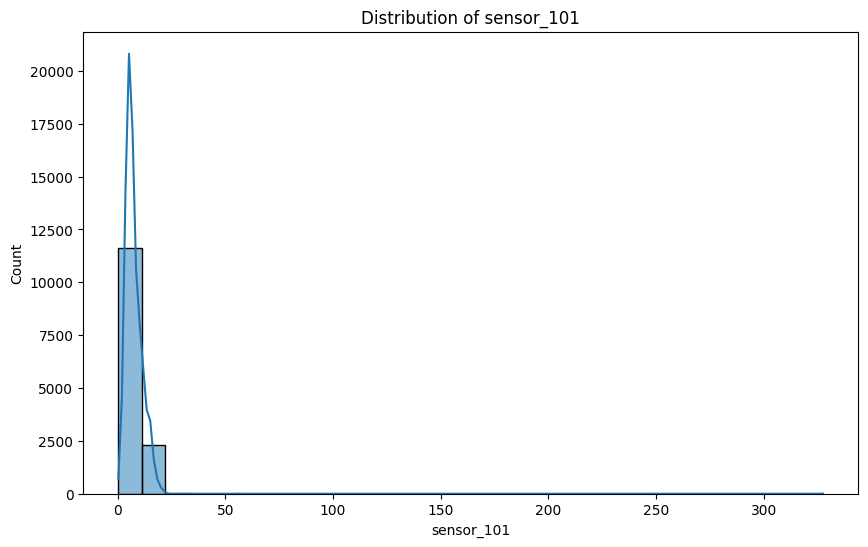

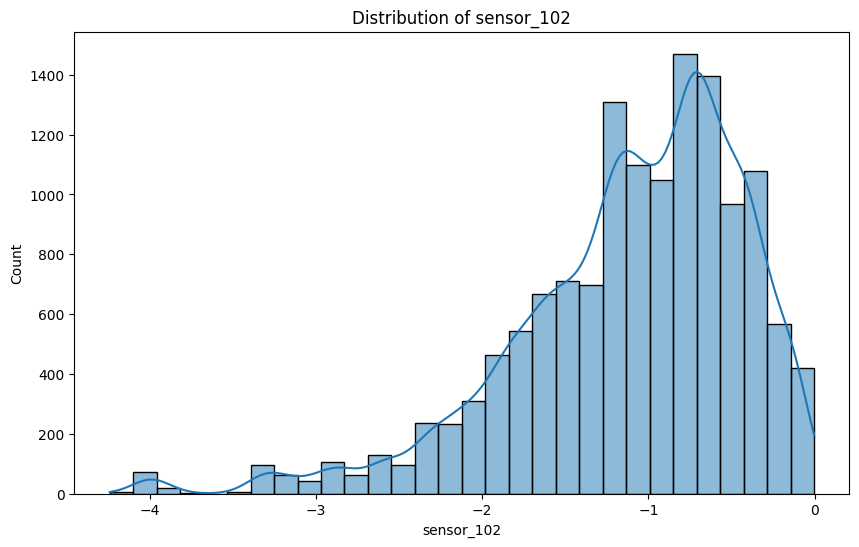

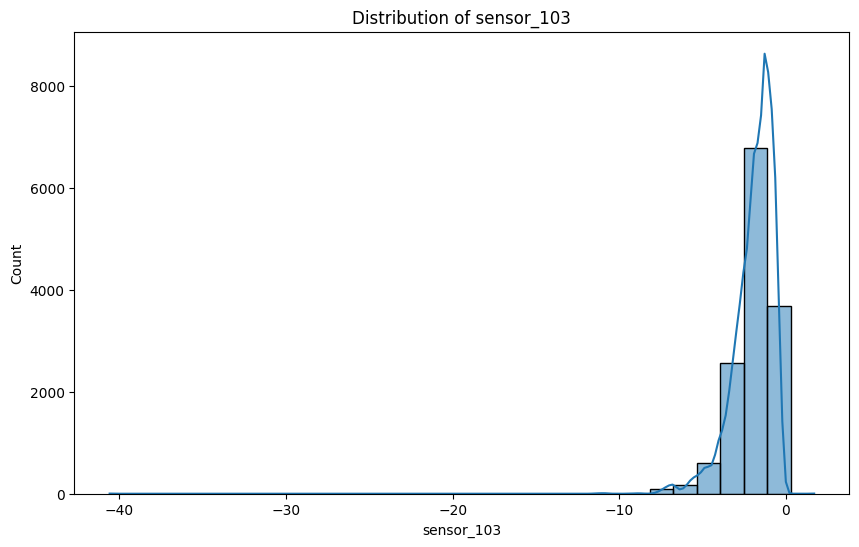

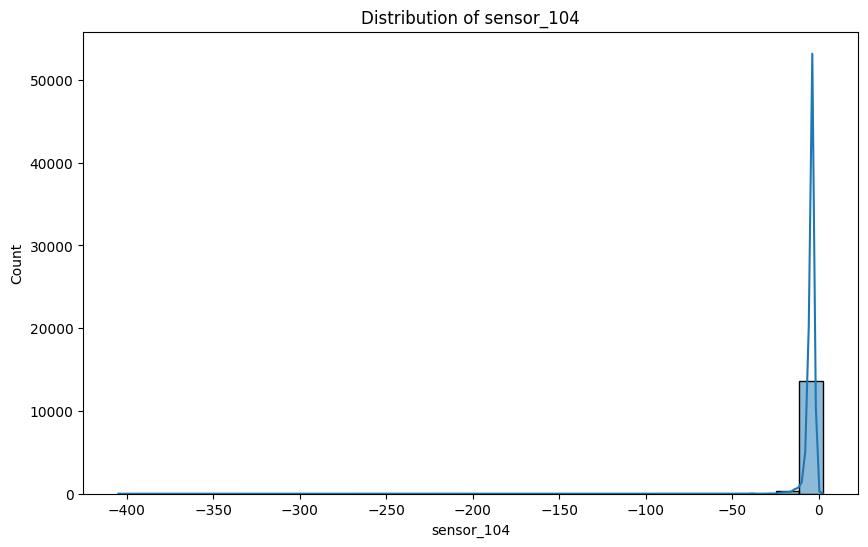

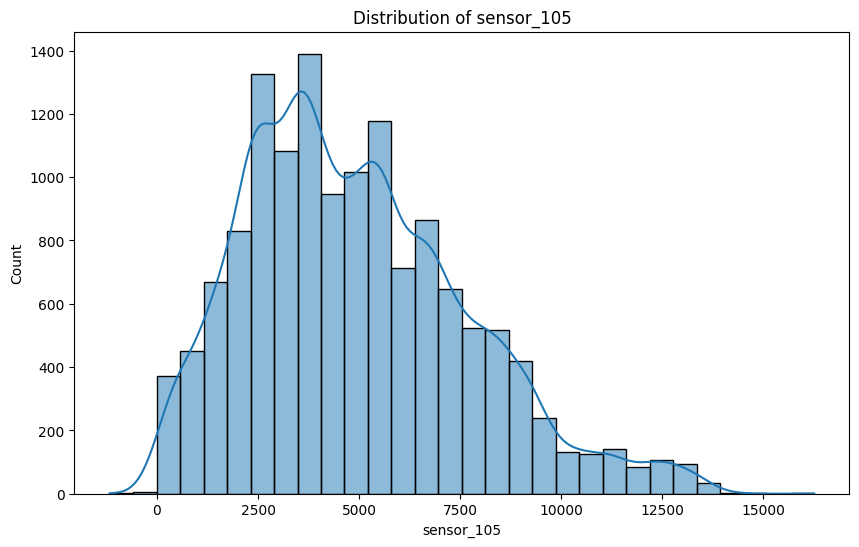

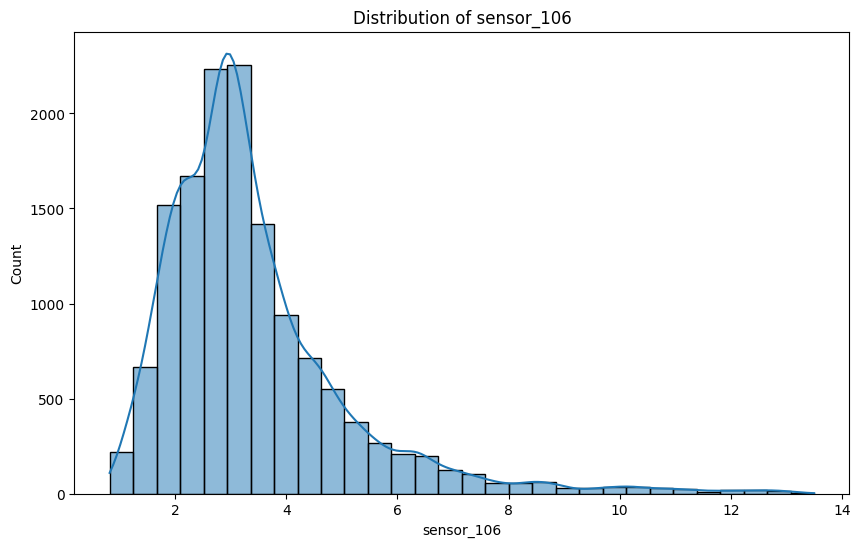

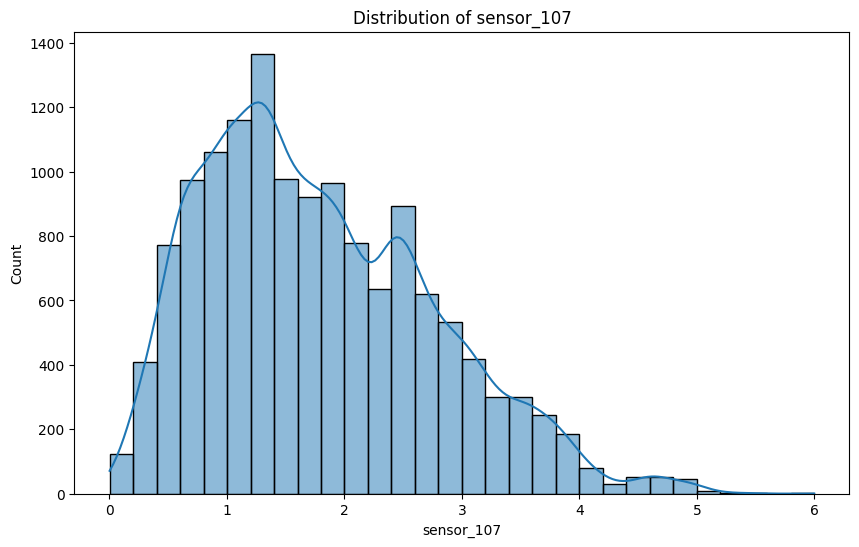

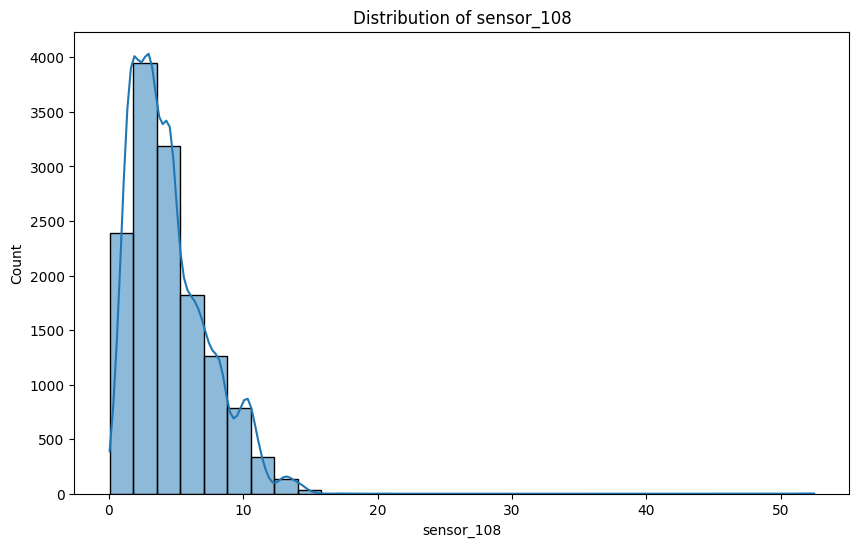

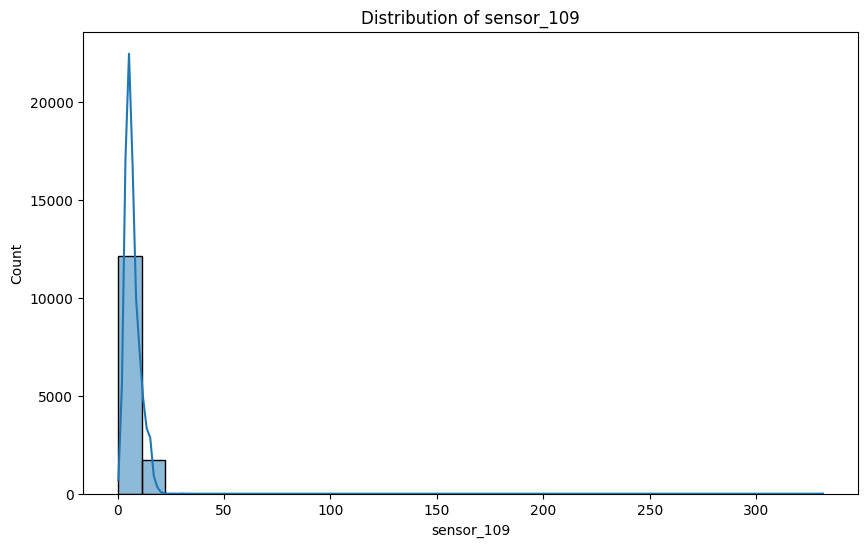

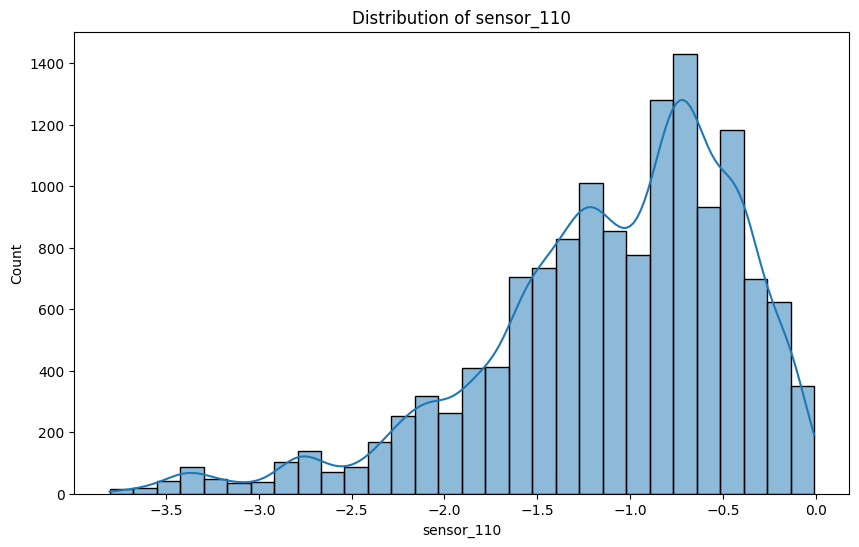

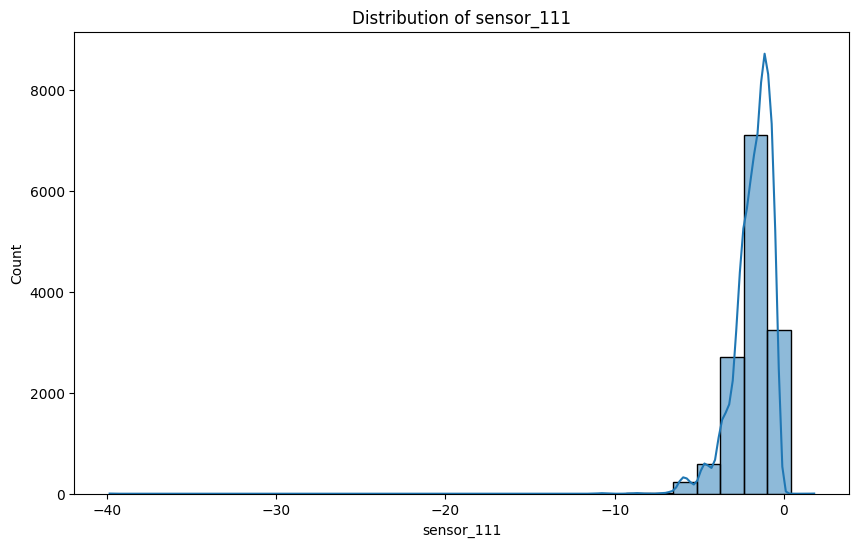

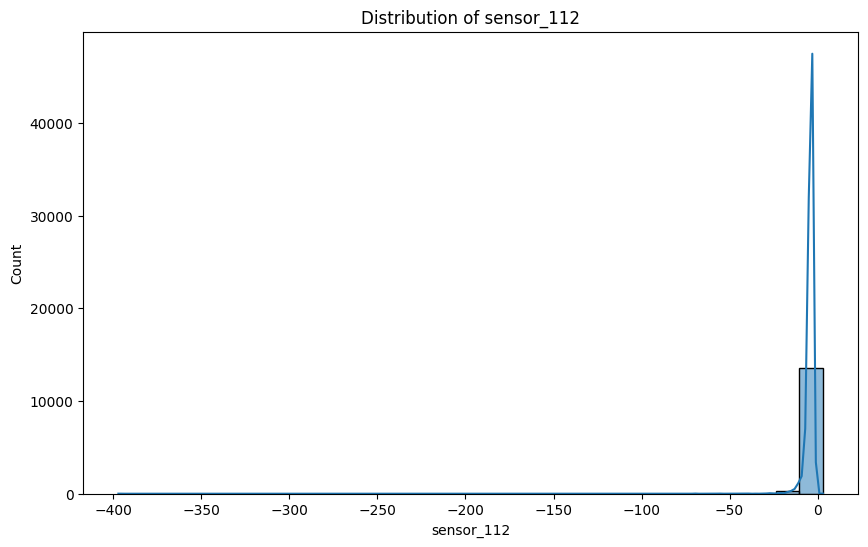

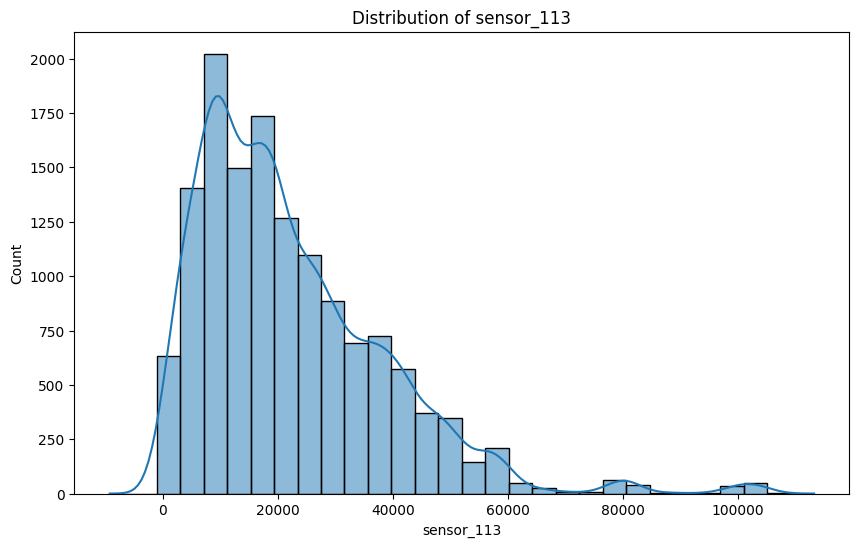

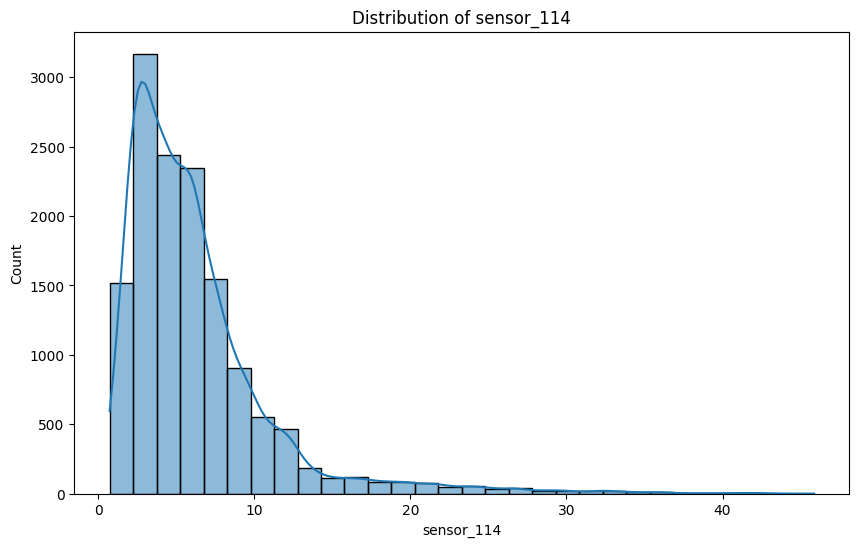

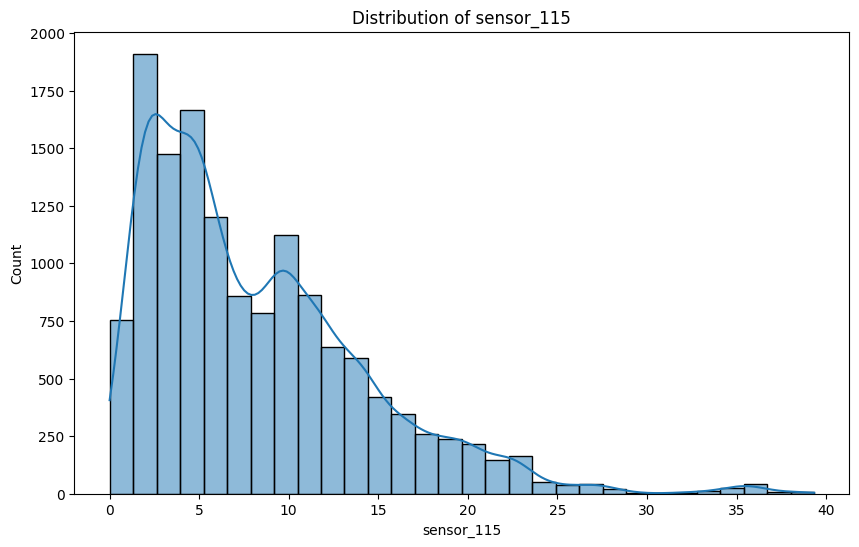

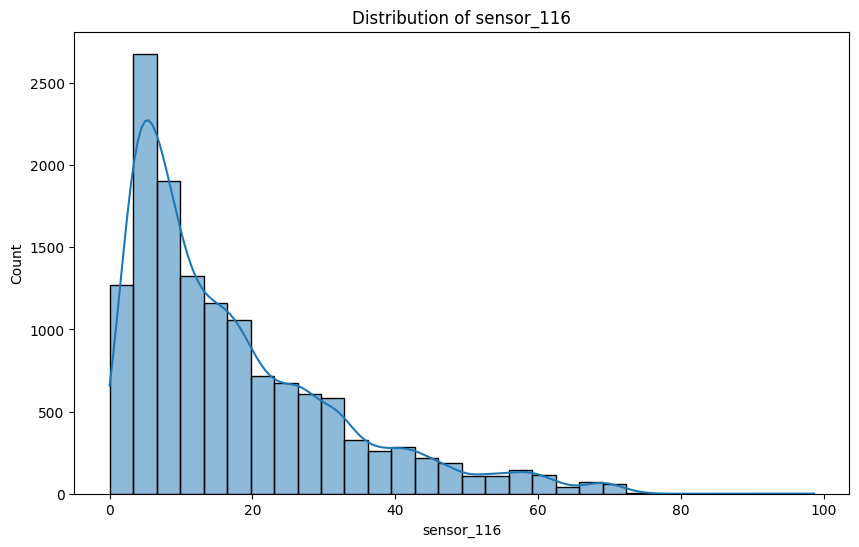

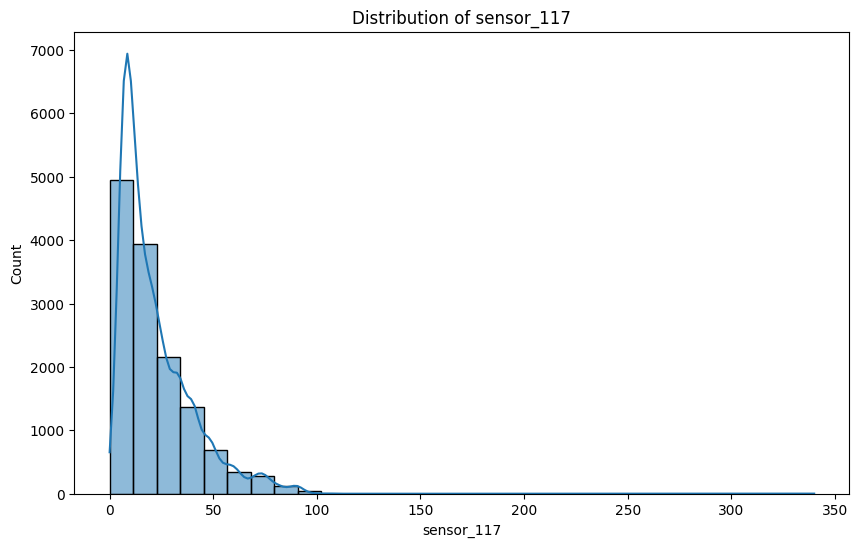

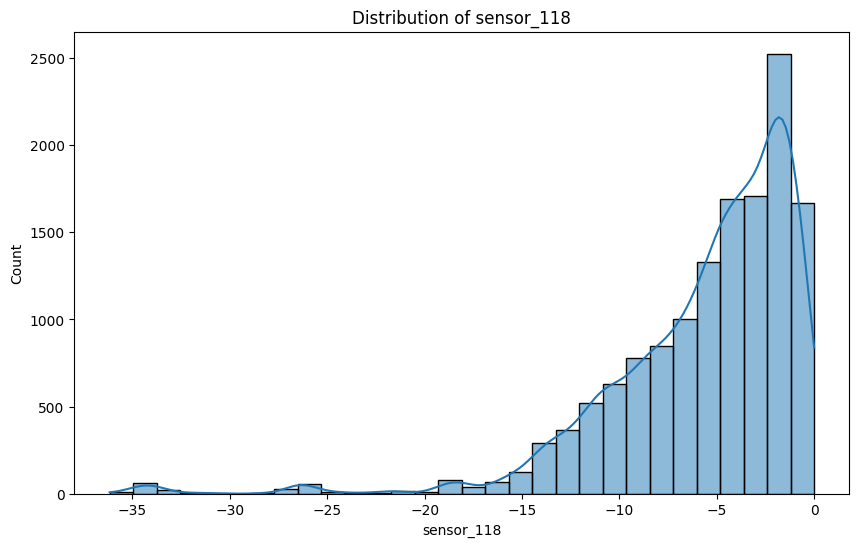

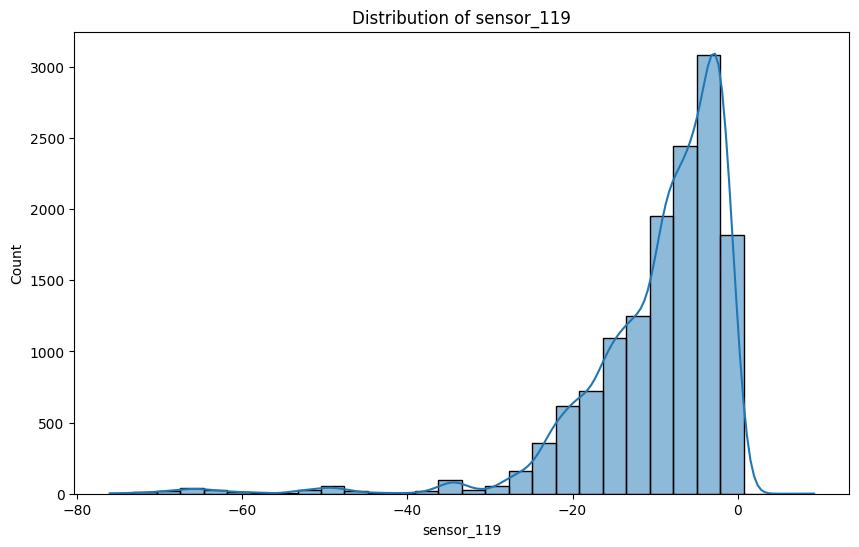

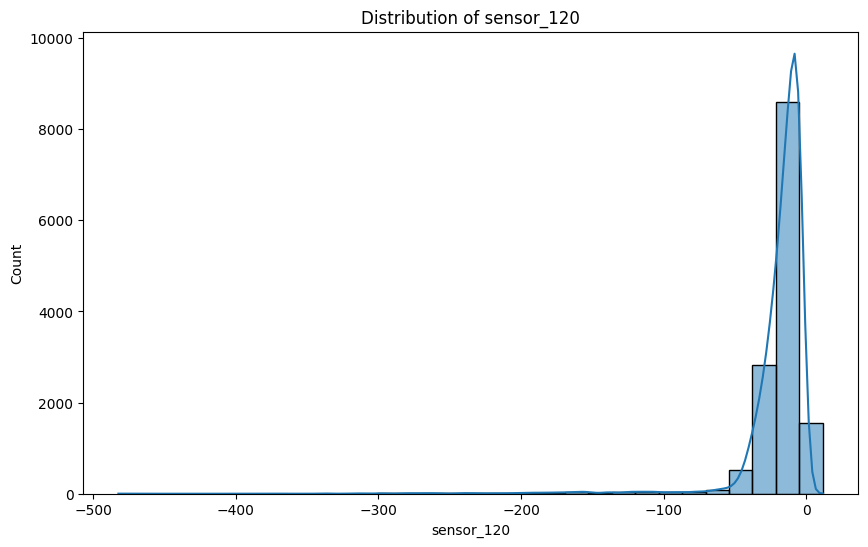

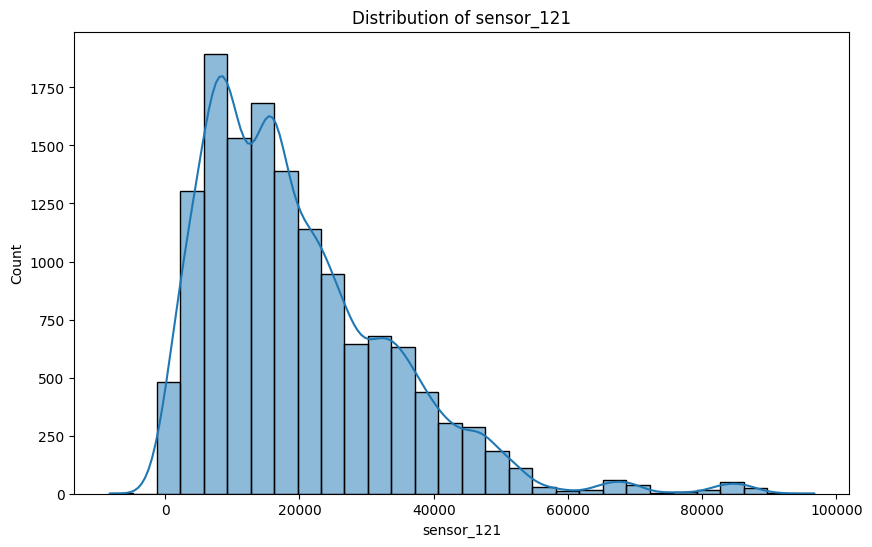

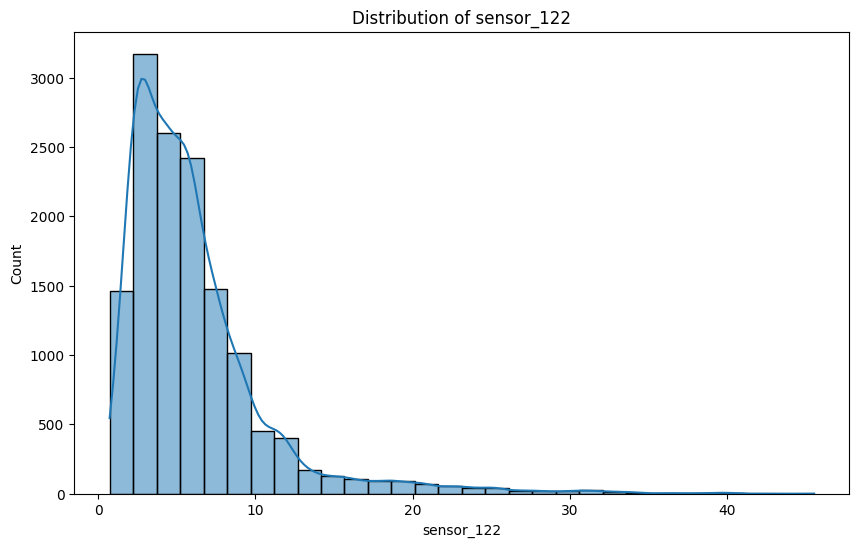

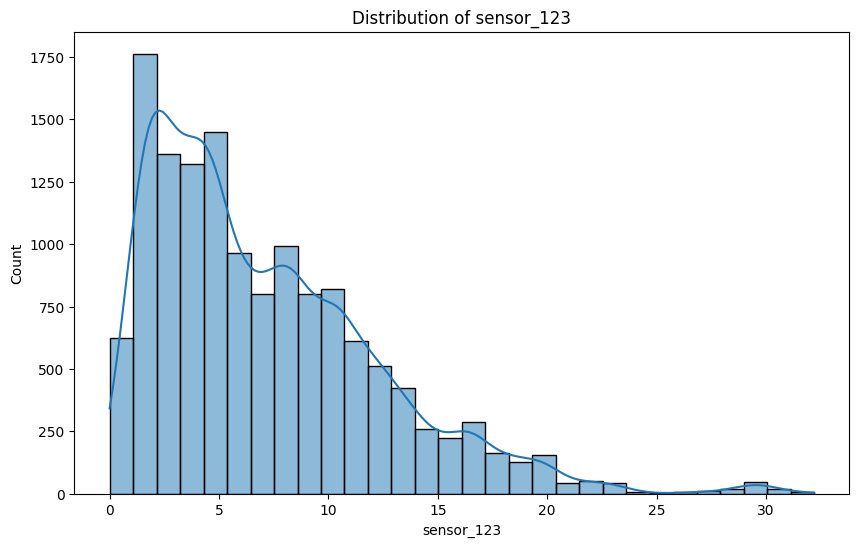

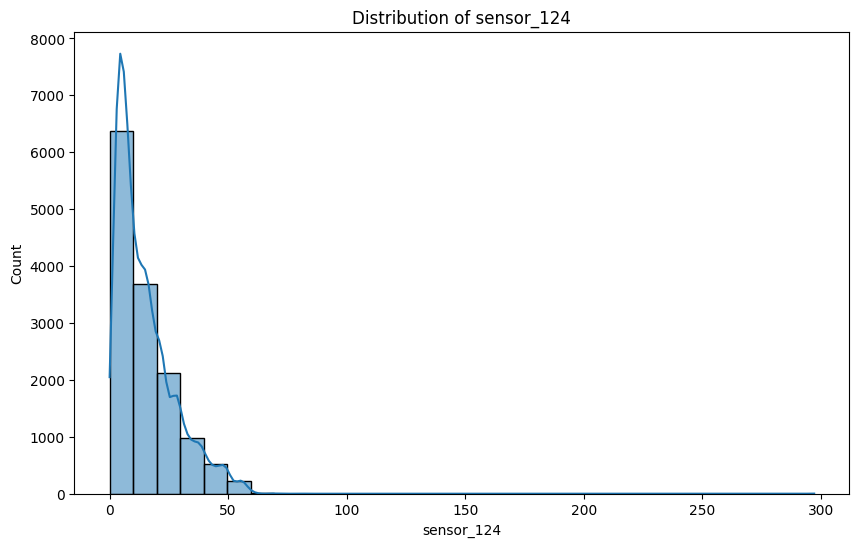

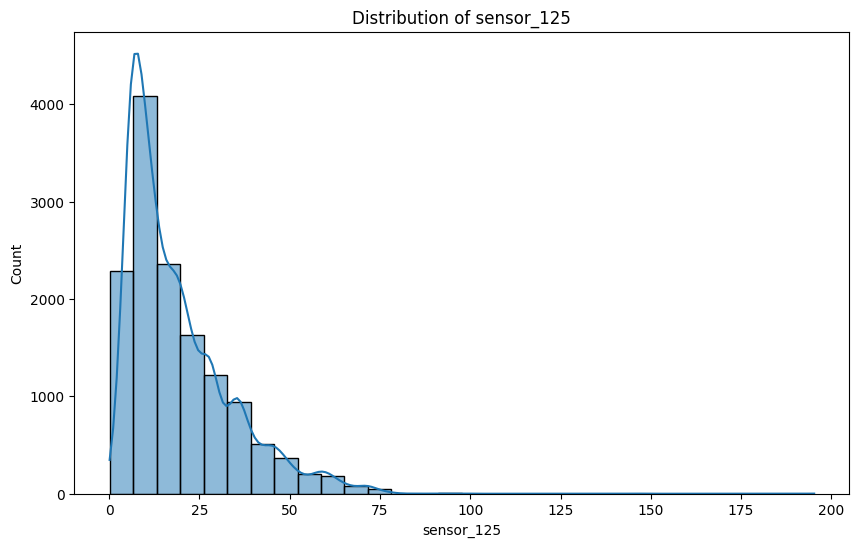

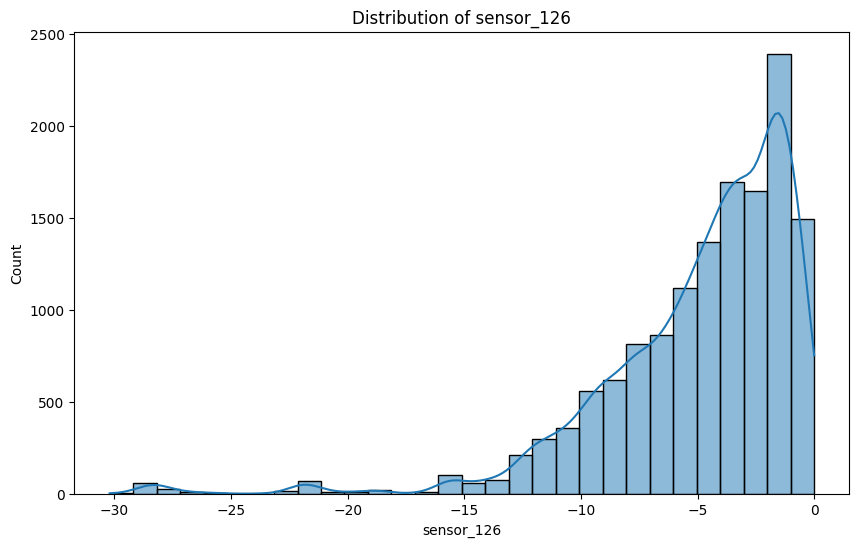

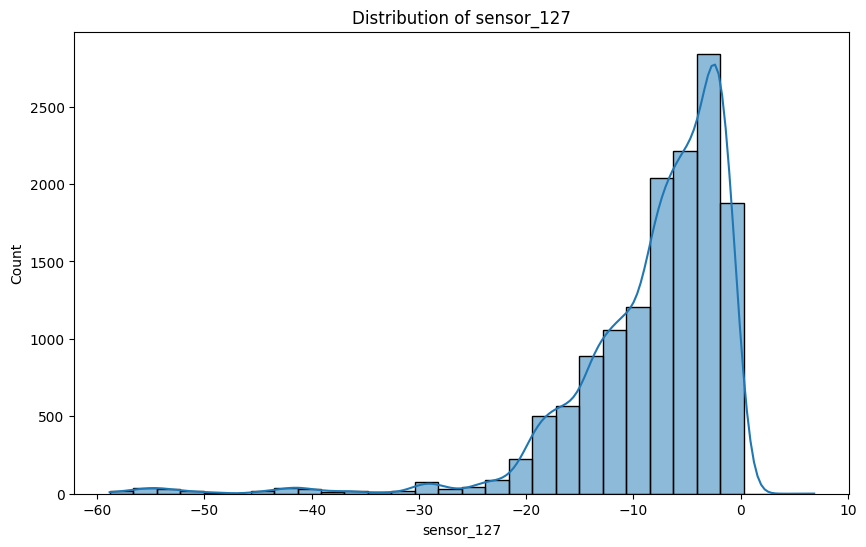

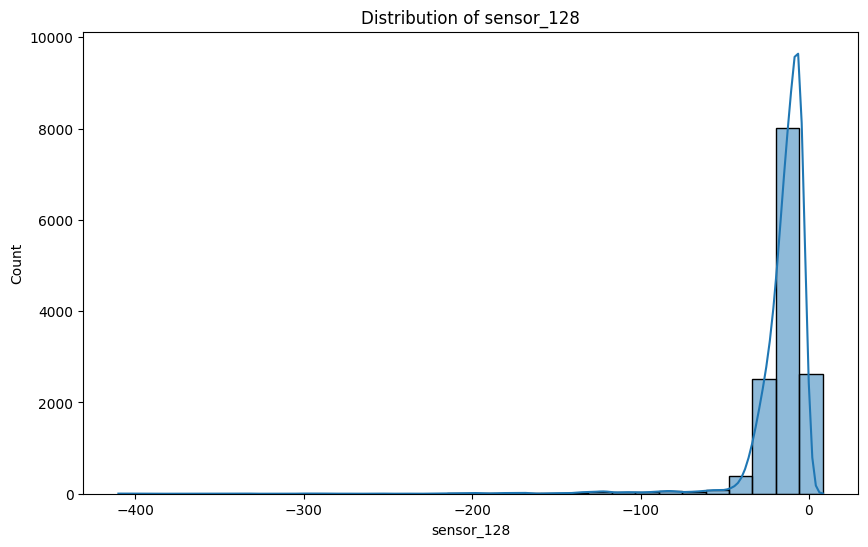

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in data.columns[:-1]:  # Exclude 'gas_class'
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


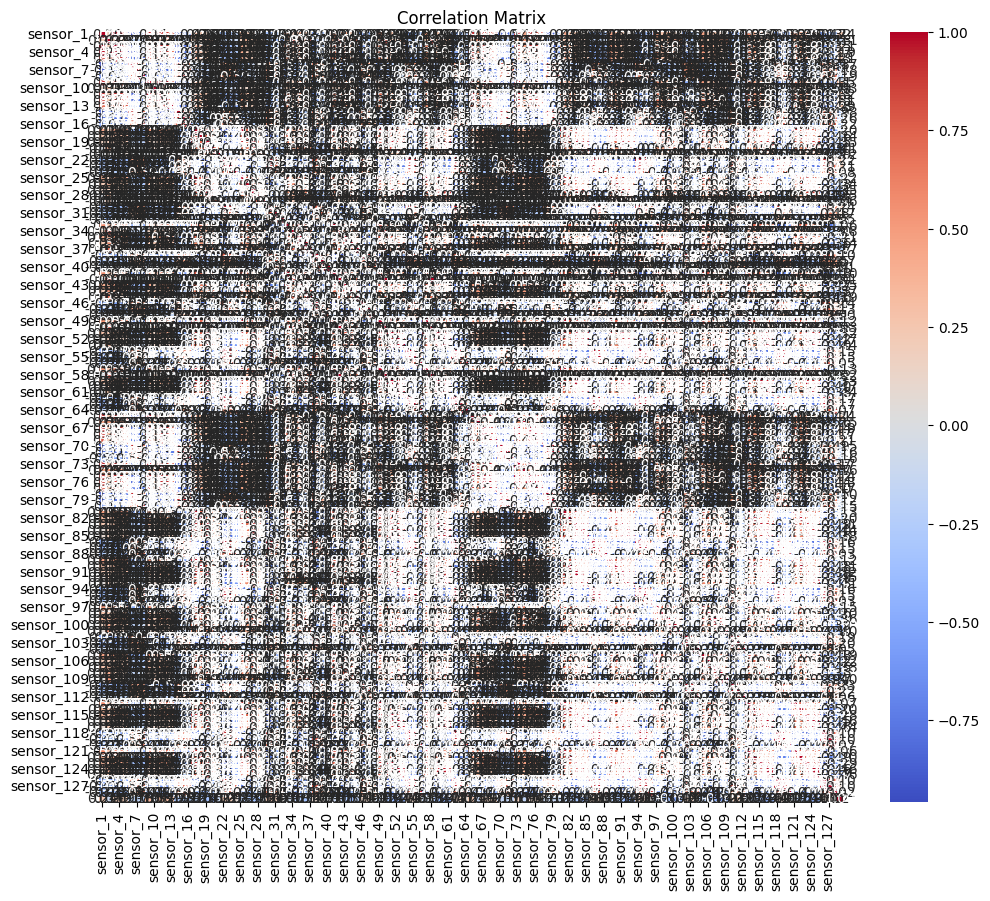

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


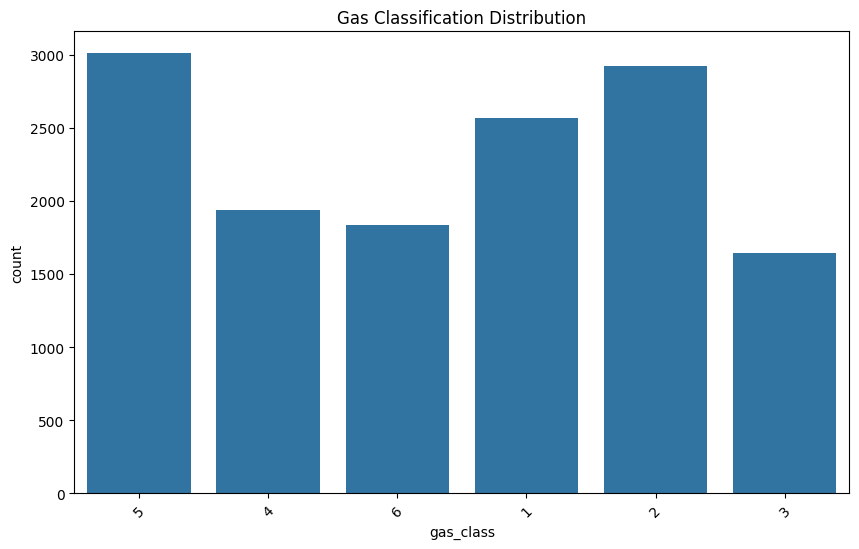

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gas_class', data=data)  
plt.title('Gas Classification Distribution')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Calculate skewness for all numeric columns
skewness = data.skew()

# Display the skewness values
print(skewness)


sensor_1      2.545258
sensor_2      70.13087
sensor_3      2.336018
sensor_4      2.200988
sensor_5      4.973879
                ...   
sensor_125    1.490849
sensor_126   -2.085395
sensor_127   -2.737512
sensor_128   -7.364719
gas_class     0.039874
Length: 129, dtype: object


In [17]:
# Identify features with high skewness
high_skewness = skewness[abs(skewness) > 1]

# Display features with high skewness
print("Features with high skewness:")
print(high_skewness)


Features with high skewness:
sensor_1      2.545258
sensor_2      70.13087
sensor_3      2.336018
sensor_4      2.200988
sensor_5      4.973879
                ...   
sensor_124    2.004494
sensor_125    1.490849
sensor_126   -2.085395
sensor_127   -2.737512
sensor_128   -7.364719
Length: 123, dtype: object


In [18]:
# Count the occurrences of each class in the target variable
class_counts = data['gas_class'].value_counts()

# Display the counts
print("Class Distribution:")
print(class_counts)

# Calculate proportions of each class
class_proportions = class_counts / class_counts.sum() * 100

# Display proportions
print("\nClass Proportions (%):")
print(class_proportions)

# Check for imbalance
threshold = 0.1  # You can adjust this threshold as needed
imbalanced_classes = class_proportions[class_proportions < threshold * 100]
if not imbalanced_classes.empty:
    print("\nImbalanced Classes:")
    print(imbalanced_classes)
else:
    print("\nNo significant imbalance detected.")


Class Distribution:
gas_class
5    3009
2    2926
1    2565
4    1936
6    1833
3    1641
Name: count, dtype: int64

Class Proportions (%):
gas_class
5    21.631919
2    21.035226
1    18.439971
4    13.918045
6    13.177570
3    11.797268
Name: count, dtype: float64

No significant imbalance detected.


In [20]:
import numpy as np
from sklearn.preprocessing import PowerTransformer
from scipy import stats

def transform_skewed_features(df, skewed_features):
    pt = PowerTransformer(method='yeo-johnson')  # Instance for Yeo-Johnson transformation
    for feature in skewed_features.index:
        if skewed_features[feature] > 1:  # Right skew
            df[feature] = np.log1p(df[feature])
        elif skewed_features[feature] < -1:  # Left skew
            # Applying Yeo-Johnson transformation for left-skewed features
            df[[feature]] = pt.fit_transform(df[[feature]])
    return df

# Step 1: Calculate skewness
skewness = data.skew()

# Step 2: Identify highly skewed features
threshold = 1
high_skewed_features = skewness[abs(skewness) > threshold]

# Step 3: Apply transformations
data_transformed = transform_skewed_features(data.copy(), high_skewed_features)

# Step 4: Validate transformations
new_skewness = data_transformed.skew()
print("\nSkewness after transformation:")
print(new_skewness)


/home/moraa/Documents/Machine-learning/Gas_Sensor/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/moraa/Documents/Machine-learning/Gas_Sensor/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/moraa/Documents/Machine-learning/Gas_Sensor/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/moraa/Documents/Machine-learning/Gas_Sensor/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/moraa/Documents/Machine-learning/Gas_Sensor/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning


Skewness after transformation:
sensor_1     -0.776325
sensor_2      0.768697
sensor_3      0.267482
sensor_4      0.208495
sensor_5      0.330855
                ...   
sensor_125    0.027076
sensor_126    0.000719
sensor_127    0.573777
sensor_128    1.849453
gas_class     0.039874
Length: 129, dtype: object


/home/moraa/Documents/Machine-learning/Gas_Sensor/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
# Check the data types of the columns
data_types = data.dtypes

# Print data types
print("Data Types of Columns:")
print(data_types)

# Check for object (string) columns
object_columns = data.select_dtypes(include=['object']).columns.tolist()

if object_columns:
    print("\nColumns with object data type:")
    print(object_columns)
else:
    print("\nNo columns with object data type found.")

Data Types of Columns:
sensor_1      float64
sensor_2      float64
sensor_3      float64
sensor_4      float64
sensor_5      float64
               ...   
sensor_125    float64
sensor_126    float64
sensor_127    float64
sensor_128    float64
gas_class      object
Length: 129, dtype: object

Columns with object data type:
['gas_class']


In [25]:
import pandas as pd
import glob
import numpy as np
from scipy import stats
import os

# Define the path to the dataset and preprocessed directory
data_path = '/home/moraa/Documents/Machine-learning/Gas_Sensor/artifacts/data_ingestion/Dataset/'
preprocessed_path = '/home/moraa/Documents/Machine-learning/Gas_Sensor/artifacts/preprocessed/'

# Create the preprocessed directory if it does not exist
os.makedirs(preprocessed_path, exist_ok=True)

# Use glob to find all .dat files in the specified directory
file_paths = glob.glob(data_path + 'batch*.dat')

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each file path
for file in file_paths:
    with open(file, 'r') as f:
        for line in f:
            # Split the line by spaces and create a dictionary for key-value pairs
            values = line.strip().split(' ')
            # Parse the first value (assuming it’s a label or index)
            label = values[0]  # You might need to adjust based on what this represents
            sensor_data = {int(kv.split(':')[0]): float(kv.split(':')[1]) for kv in values[1:]}
            # Append the label to the dictionary
            sensor_data['label'] = label
            # Create a DataFrame from the dictionary and append to the list
            dataframes.append(pd.DataFrame(sensor_data, index=[0]))

# Concatenate all DataFrames into a single DataFrame
data = pd.concat(dataframes, ignore_index=True)

# Display the shape and first few rows of the combined DataFrame
print(data.shape)
print(data.head())

# Rename columns
sensor_columns = [f'sensor_{i}' for i in range(1, 129)]  # Adjust the range if needed
sensor_columns.append('gas_class')  # Assuming the last column is the target

# Assign new column names to the DataFrame
data.columns = sensor_columns

# Display the first few rows with new column names
print(data.head())

# Transform skewed features
# Identify skewed features
skewed_features = data[sensor_columns[:-1]].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness = skewed_features[skewed_features > 0.5]  # You can adjust the threshold as needed
print("Skewed features:\n", skewness)

# Apply log transformation to skewed features
for feature in skewness.index:
    data[feature] = np.log1p(data[feature])  # log1p handles zero values safely

# One-Hot Encoding for the target variable
data = pd.get_dummies(data, columns=['gas_class'], drop_first=True)

# Save the preprocessed data to a CSV file
output_file_path = os.path.join(preprocessed_path, 'preprocessed_data.csv')
data.to_csv(output_file_path, index=False)

# Confirm that the data has been saved
print(f"Preprocessed data saved to: {output_file_path}")

# Display the first few rows after transformations
print("Data after transformations:\n", data.head())


(13910, 129)
            1         2         3         4          5         6         7  \
0  11977.0371  2.946364  2.490357  3.283046   8.131875 -1.657614 -2.670484   
1  21234.2896  4.223873  4.758852  6.588781  10.873780 -3.145160 -4.474324   
2  13190.5258  3.139281  2.743704  3.603623   8.335304 -1.807550 -2.781656   
3  15803.7851  3.500589  3.375378  4.549901   8.983869 -2.278670 -3.915519   
4  16342.6787  3.497127  3.393961  4.303557   8.713730 -2.173565 -3.373084   

           8           9        10  ...        120         121       122  \
0 -11.795855     87.6957  1.159134  ...  -7.170650   8644.8520  2.833984   
1 -14.394855  33730.9175  7.440933  ... -14.347134  18538.2510  4.372579   
2  -9.959871  32443.2602  5.922316  ...  -7.089700   8914.2002  2.809080   
3 -11.937122  29541.8398  3.865898  ... -16.511583  18378.3940  4.215725   
4 -11.741132  38268.0747  6.157833  ...  -6.492106   8903.2504  2.907423   

        123        124        125       126       127        

/home/moraa/Documents/Machine-learning/Gas_Sensor/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Preprocessed data saved to: /home/moraa/Documents/Machine-learning/Gas_Sensor/artifacts/preprocessed/preprocessed_data.csv
Data after transformations:
    sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  \
0  9.390830  1.372795  1.250004  1.454664  2.211771 -1.657614 -2.670484   
1  9.963420  1.653239  1.750738  2.026671  2.474333 -3.145160 -4.474324   
2  9.487330  1.420522  1.320075  1.526844  2.233803 -1.807550 -2.781656   
3  9.668068  1.504208  1.475993  1.713780  2.300971 -2.278670 -3.915519   
4  9.701596  1.503439  1.480231  1.668378  2.273540 -2.173565 -3.373084   

    sensor_8   sensor_9  sensor_10  ...  sensor_124  sensor_125  sensor_126  \
0 -11.795855   4.485211   0.769707  ...    1.387330    1.849856   -1.387367   
1 -14.394855  10.426200   2.133093  ...    2.516145    2.751323   -4.112915   
2  -9.959871  10.387279   1.934750  ...    1.413588    1.906420   -1.459713   
3 -11.937122  10.293597   1.582251  ...    2.501457    2.764487   -4.010406   
4 